# CSGODATA PROCESS


**Group 13 ËØæÁ®ãËÆæËÆ°**

Âº†‰∏ÄÈ∏£ 3019234068  

Êó•ÊúüÔºö2022/5/9

## Intro of DataSet

Êï∞ÊçÆÈõÜÔºöhttps://www.kaggle.com/datasets/skihikingkevin/csgo-matchmaking-damage


È£û‰π¶‰∏≠Êü•ÁúãÂêÑË°®ÁöÑÂ≠óÊÆµÔºöhttps://ulahdzk9l7.feishu.cn/docs/doccns9vTqkGv6I2MCKwGiJLfAd


Êú¨Êï∞ÊçÆÈõÜÂåÖÊã¨‰ª•‰∏ãË°®Ôºö

- Meta_demos
- master_dmg
- master_kills
- master_grenade
- mm_master

‰ΩøÁî® `sc.textFile()` ËØªÂèñHDFS‰∏≠ÁöÑ `csv` Ë°®Ê†ºÔºåÁªèËøáÊª§ÂêéÂ≠ò‰∏∫ RDD ÂØπË±°„ÄÇ

In [1]:
sc.master

'yarn'

# Êï∞ÊçÆÈõÜÂØºÂÖ•

## meta_demo Ë°®ÁöÑÂØºÂÖ•ÂíåÂ§ÑÁêÜ

‰∏ªË°®Â≠óÊÆµÔºö

file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val

In [2]:
#ÂØºÂÖ•Êï∞ÊçÆË°®
#Ë°®Â§¥
meta_header = sc.textFile("/spark/csgodata/esea_meta_demos.part1.csv").first()
#raw data ÂàõÂª∫RDD
meta_1_RDD = sc.textFile("/spark/csgodata/esea_meta_demos.part1.csv").filter(lambda x:x !=meta_header).map(lambda x: x.split(","))
meta_2_RDD = sc.textFile("/spark/csgodata/esea_meta_demos.part2.csv").filter(lambda x:x !=meta_header).map(lambda x: x.split(","))

In [3]:
print(meta_1_RDD.count())
print(meta_2_RDD.count())

215919
161710


In [4]:
meta_RDD=meta_1_RDD.union(meta_2_RDD)

In [5]:
meta_RDD.count()

377629

In [6]:
#meta_RDD.take(5)

### ÂàõÂª∫ DFÔºö

In [6]:
#‰∏çË¶ÅÊØèÊ¨°Ë¶ÅÊâßË°åÊçè
sqlContext = SparkSession.builder.getOrCreate()

In [7]:
#ÂàõÂª∫DF
from pyspark.sql import Row
meta = meta_RDD.map(lambda p:
     Row(
         file=p[0], 
         map=p[1],
         round=int(p[2]),
         start_seconds=p[3],
         end_seconds=p[4],
         winner_team=p[5],
         winner_side=p[6],
         round_type=p[7],
         ct_eq_val=int(p[8]),
         t_eq_val=int(p[9])
    )
)
meta.take(5)
#'file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val'

[Row(ct_eq_val=4300, end_seconds='160.9591', file='esea_match_13770997.dem', map='de_overpass', round=1, round_type='PISTOL_ROUND', start_seconds='94.30781999999999', t_eq_val=4250, winner_side='Terrorist', winner_team='Hentai Hooligans'),
 Row(ct_eq_val=6300, end_seconds='279.3998', file='esea_match_13770997.dem', map='de_overpass', round=2, round_type='ECO', start_seconds='160.9591', t_eq_val=19400, winner_side='Terrorist', winner_team='Hentai Hooligans'),
 Row(ct_eq_val=7650, end_seconds='341.0084', file='esea_match_13770997.dem', map='de_overpass', round=3, round_type='SEMI_ECO', start_seconds='279.3998', t_eq_val=19250, winner_side='Terrorist', winner_team='Hentai Hooligans'),
 Row(ct_eq_val=24900, end_seconds='435.4259', file='esea_match_13770997.dem', map='de_overpass', round=4, round_type='NORMAL', start_seconds='341.0084', t_eq_val=23400, winner_side='Terrorist', winner_team='Hentai Hooligans'),
 Row(ct_eq_val=5400, end_seconds='484.2398', file='esea_match_13770997.dem', map='

In [8]:
meta_df = sqlContext.createDataFrame(meta)
meta_df.printSchema()

root
 |-- ct_eq_val: long (nullable = true)
 |-- end_seconds: string (nullable = true)
 |-- file: string (nullable = true)
 |-- map: string (nullable = true)
 |-- round: long (nullable = true)
 |-- round_type: string (nullable = true)
 |-- start_seconds: string (nullable = true)
 |-- t_eq_val: long (nullable = true)
 |-- winner_side: string (nullable = true)
 |-- winner_team: string (nullable = true)



In [10]:
meta_df.show(5)

+---------+-----------+--------------------+-----------+-----+------------+-----------------+--------+----------------+----------------+
|ct_eq_val|end_seconds|                file|        map|round|  round_type|    start_seconds|t_eq_val|     winner_side|     winner_team|
+---------+-----------+--------------------+-----------+-----+------------+-----------------+--------+----------------+----------------+
|     4300|   160.9591|esea_match_137709...|de_overpass|    1|PISTOL_ROUND|94.30781999999999|    4250|       Terrorist|Hentai Hooligans|
|     6300|   279.3998|esea_match_137709...|de_overpass|    2|         ECO|         160.9591|   19400|       Terrorist|Hentai Hooligans|
|     7650|   341.0084|esea_match_137709...|de_overpass|    3|    SEMI_ECO|         279.3998|   19250|       Terrorist|Hentai Hooligans|
|    24900|   435.4259|esea_match_137709...|de_overpass|    4|      NORMAL|         341.0084|   23400|       Terrorist|Hentai Hooligans|
|     5400|   484.2398|esea_match_137709.

In [11]:
#Ê≥®ÂÜåTempTable
meta_df.registerTempTable("meta_table")
sqlContext.sql(" SELECT count(*) counts FROM meta_table").show()
#ÂêéÈù¢ÁöÑË°®ÔºåÁî®Êó∂ÂÜçÊ≥®ÂÜå

+------+
|counts|
+------+
|377629|
+------+



## master_dmgË°®ÁöÑÂØºÂÖ•

'file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,
 bomb_site,hitbox,wp,wp_type,[att_id,att_rank,vic_id,vic_rank],att_pos_x,att_pos_y,vic_pos_x,vic_pos_y'

In [9]:
#ÂØºÂÖ•Êï∞ÊçÆË°®
#Ë°®Â§¥
dmg_header = sc.textFile("/spark/csgodata/esea_master_dmg_demos.part1.csv").first()
#raw data ÂàõÂª∫RDD
dmg_1_RDD = sc.textFile("/spark/csgodata/esea_master_dmg_demos.part1.csv").filter(lambda x:x !=dmg_header).map(lambda x: x.split(","))
dmg_2_RDD = sc.textFile("/spark/csgodata/esea_master_dmg_demos.part2.csv").filter(lambda x:x !=dmg_header).map(lambda x: x.split(","))

In [13]:
print(dmg_1_RDD.count())
print(dmg_2_RDD.count())

5992097
4546085


In [10]:
dmg_RDD=dmg_1_RDD.union(dmg_2_RDD)
#dmg_RDD.count()

In [15]:
#dmg_RDD.take(2)
dmg_header

'file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y'

In [11]:
#ÂàõÂª∫DF
sqlContext = SparkSession.builder.getOrCreate()
from pyspark.sql import Row
dmg_tmp = dmg_RDD.map(lambda p:
     Row(
         file=p[0], 
         round=p[1],
         tick=p[2],
         seconds=p[3],
         att_team=p[4],
         vic_team=p[5],
         att_side=p[6],
         vic_side=p[7],
         hp_dmg=p[8],
         arm_dmg=p[9],
         is_bomb_planted=p[10],
         bomb_site=p[11],
         hitbox=p[12],
         wp=p[13],
         wp_type=p[14],
         att_pos_x=p[19],
         att_pos_y=p[20],
         vic_pos_x=p[21],
         vic_pos_y=p[22]
    )
)

ÂàõÂª∫dmg_dfÔºö

In [12]:
dmg_df = sqlContext.createDataFrame(dmg_tmp)
dmg_df.printSchema()
#'file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,
# bomb_site,hitbox,wp,wp_type,[att_id,att_rank,vic_id,vic_rank],att_pos_x,att_pos_y,vic_pos_x,vic_pos_y'

root
 |-- arm_dmg: string (nullable = true)
 |-- att_pos_x: string (nullable = true)
 |-- att_pos_y: string (nullable = true)
 |-- att_side: string (nullable = true)
 |-- att_team: string (nullable = true)
 |-- bomb_site: string (nullable = true)
 |-- file: string (nullable = true)
 |-- hitbox: string (nullable = true)
 |-- hp_dmg: string (nullable = true)
 |-- is_bomb_planted: string (nullable = true)
 |-- round: string (nullable = true)
 |-- seconds: string (nullable = true)
 |-- tick: string (nullable = true)
 |-- vic_pos_x: string (nullable = true)
 |-- vic_pos_y: string (nullable = true)
 |-- vic_side: string (nullable = true)
 |-- vic_team: string (nullable = true)
 |-- wp: string (nullable = true)
 |-- wp_type: string (nullable = true)



In [18]:
dmg_df.show(5)

+-------+---------+-------------------+----------------+----------------+---------+--------------------+--------+------+---------------+-----+--------+-----+---------+------------------+----------------+----------------+-------+-------+
|arm_dmg|att_pos_x|          att_pos_y|        att_side|        att_team|bomb_site|                file|  hitbox|hp_dmg|is_bomb_planted|round| seconds| tick|vic_pos_x|         vic_pos_y|        vic_side|        vic_team|     wp|wp_type|
+-------+---------+-------------------+----------------+----------------+---------+--------------------+--------+------+---------------+-----+--------+-----+---------+------------------+----------------+----------------+-------+-------+
|      0|      0.0|                0.0|            None|           World|         |esea_match_137709...| Generic|     1|          False|    1|111.8476|14372|      0.0|               0.0|CounterTerrorist|    Animal Style|Unknown| Unkown|
|      9| -1499.69|           63.33829|CounterTerror

## master_kill Ë°®ÁöÑÂØºÂÖ•

file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted

In [13]:
#ÂØºÂÖ•Êï∞ÊçÆË°®
#Ë°®Â§¥
kill_header = sc.textFile("/spark/csgodata/esea_master_kills_demos.part1.csv").first()
#raw data ÂàõÂª∫RDD
kill_1_RDD = sc.textFile("/spark/csgodata/esea_master_kills_demos.part1.csv").filter(lambda x:x !=kill_header).map(lambda x: x.split(","))
kill_2_RDD = sc.textFile("/spark/csgodata/esea_master_kills_demos.part2.csv").filter(lambda x:x !=kill_header).map(lambda x: x.split(","))

In [14]:
kill_RDD=kill_1_RDD.union(kill_2_RDD)
#kill_RDD.count()

In [21]:
kill_header

'file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted'

In [15]:
#ÂàõÂª∫DF
#sqlContext = SparkSession.builder.getOrCreate()
from pyspark.sql import Row
kill_tmp = kill_RDD.map(lambda p:
     Row(
         file=p[0], 
         round=p[1],
         tick=p[2],
         seconds=p[3],
         att_team=p[4],
         vic_team=p[5],
         att_side=p[6],
         vic_side=p[7],
         ct_alive=p[10],
         t_alive=p[11],
         is_bomb_planted=p[12],
         bomb_site=p[11],
         wp=p[8],
         wp_type=p[9]
    )
)

In [16]:
kill_df = sqlContext.createDataFrame(kill_tmp)
kill_df.printSchema()
#'file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted'

root
 |-- att_side: string (nullable = true)
 |-- att_team: string (nullable = true)
 |-- bomb_site: string (nullable = true)
 |-- ct_alive: string (nullable = true)
 |-- file: string (nullable = true)
 |-- is_bomb_planted: string (nullable = true)
 |-- round: string (nullable = true)
 |-- seconds: string (nullable = true)
 |-- t_alive: string (nullable = true)
 |-- tick: string (nullable = true)
 |-- vic_side: string (nullable = true)
 |-- vic_team: string (nullable = true)
 |-- wp: string (nullable = true)
 |-- wp_type: string (nullable = true)



In [24]:
kill_df.show(5)

+----------------+----------------+---------+--------+--------------------+---------------+-----+--------+-------+-----+----------------+----------------+-----+-------+
|        att_side|        att_team|bomb_site|ct_alive|                file|is_bomb_planted|round| seconds|t_alive| tick|        vic_side|        vic_team|   wp|wp_type|
+----------------+----------------+---------+--------+--------------------+---------------+-----+--------+-------+-----+----------------+----------------+-----+-------+
|CounterTerrorist|    Animal Style|        4|       5|esea_match_137709...|          False|    1|30.74165|      4|16058|       Terrorist|Hentai Hooligans|  USP| Pistol|
|       Terrorist|Hentai Hooligans|        4|       4|esea_match_137709...|          False|    1|31.93185|      4|16210|CounterTerrorist|    Animal Style|Glock| Pistol|
|       Terrorist|Hentai Hooligans|        4|       3|esea_match_137709...|          False|    1|34.28094|      4|16510|CounterTerrorist|    Animal Style|G

## master_grenade Ë°®ÁöÑÂØºÂÖ•

'file,round,seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,

is_bomb_planted,bomb_site,hitbox,nade,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y'

In [25]:
#ÂØºÂÖ•Êï∞ÊçÆË°®
#Ë°®Â§¥
gre_header = sc.textFile("/spark/csgodata/esea_master_grenades_demos.part1.csv").first()
#raw data ÂàõÂª∫RDD
gre_1_RDD = sc.textFile("/spark/csgodata/esea_master_grenades_demos.part1.csv").filter(lambda x:x !=gre_header).map(lambda x: x.split(","))
gre_2_RDD = sc.textFile("/spark/csgodata/esea_master_grenades_demos.part2.csv").filter(lambda x:x !=gre_header).map(lambda x: x.split(","))

In [26]:
gre_RDD=gre_1_RDD.union(gre_2_RDD)
gre_RDD.count()

5246458

In [27]:
gre_header

'file,round,seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y'

In [28]:
#ÂàõÂª∫DF
#sqlContext = SparkSession.builder.getOrCreate()
#from pyspark.sql import Row
gre_tmp = gre_RDD.map(lambda p:
     Row(
         file=p[0], 
         round=p[1],
         seconds=p[2],
         att_team=p[3],
         vic_team=p[4],
         att_side=p[7],
         vic_side=p[8],
         hp_dmg=p[9],
         arm_dmg=p[10],
         is_bomb_planted=p[11],
         bomb_site=p[12],
         hitbox=p[13],
         nade=p[14],
         att_pos_x=p[17],
         att_pos_y=p[18],
         nade_land_x=p[19],
         nade_land_y=p[20],
         vic_pos_x=p[21],
         vic_pos_y=p[22]
    )
)

In [29]:
gre_df = sqlContext.createDataFrame(gre_tmp)
gre_df.printSchema()

root
 |-- arm_dmg: string (nullable = true)
 |-- att_pos_x: string (nullable = true)
 |-- att_pos_y: string (nullable = true)
 |-- att_side: string (nullable = true)
 |-- att_team: string (nullable = true)
 |-- bomb_site: string (nullable = true)
 |-- file: string (nullable = true)
 |-- hitbox: string (nullable = true)
 |-- hp_dmg: string (nullable = true)
 |-- is_bomb_planted: string (nullable = true)
 |-- nade: string (nullable = true)
 |-- nade_land_x: string (nullable = true)
 |-- nade_land_y: string (nullable = true)
 |-- round: string (nullable = true)
 |-- seconds: string (nullable = true)
 |-- vic_pos_x: string (nullable = true)
 |-- vic_pos_y: string (nullable = true)
 |-- vic_side: string (nullable = true)
 |-- vic_team: string (nullable = true)



In [30]:
gre_df.show(5)

+-------+-------------------+-------------------+----------------+----------------+---------+--------------------+-------+------+---------------+-------+-------------------+-----------+-----+--------+---------+-------------------+----------------+------------+
|arm_dmg|          att_pos_x|          att_pos_y|        att_side|        att_team|bomb_site|                file| hitbox|hp_dmg|is_bomb_planted|   nade|        nade_land_x|nade_land_y|round| seconds|vic_pos_x|          vic_pos_y|        vic_side|    vic_team|
+-------+-------------------+-------------------+----------------+----------------+---------+--------------------+-------+------+---------------+-------+-------------------+-----------+-----+--------+---------+-------------------+----------------+------------+
|      0|          -1618.146|          -66.00259|CounterTerrorist|    Animal Style|        B|esea_match_137709...|       |     0|           True|  Smoke|          -949.8569|  -340.3019|    1|153.1602|         |       

## mmË°®ÁöÑÂØºÂÖ•

Ëøô‰∏ÄÈÉ®ÂàÜ‰∏ªË¶ÅÂÅöÊÆµ‰ΩçÂàÜÊûêÔºåÊúâÊó∂Èó¥ÂÜçÂÅö„ÄÇ

mm_masterÂ≠óÊÆµÔºö

',file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,

bomb_site,hitbox,wp,wp_type,award,winner_team,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,

att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank'

In [31]:
#ÂØºÂÖ•Êï∞ÊçÆË°®
#Ë°®Â§¥
mmmaster_header = sc.textFile("/spark/csgodata/mm_master_demos.csv").first()
#raw data ÂàõÂª∫RDD
mmmaster_RDD = sc.textFile("/spark/csgodata/mm_master_demos.csv").filter(lambda x:x !=mmmaster_header).map(lambda x: x.split(","))

In [32]:
mmmaster_RDD.count()

955466

In [33]:
mmmaster_header

',file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,award,winner_team,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank'

In [34]:
#ÂàõÂª∫DF
#sqlContext = SparkSession.builder.getOrCreate()
#from pyspark.sql import Row
"""
mmmaster_tmp = dmg_RDD.map(lambda p:
     Row(
         file=p[0], 
         map=p[1],
         date=p[3],
         round=p[4],
         seconds=p[5],
         att_team=p[6],
         vic_side=p[7],
         hp_dmg=p[8],
         arm_dmg=p[9],
         is_bomb_planted=p[10],
         bomb_site=p[11],
         hitbox=p[12],
         wp=p[13],
         wp_type=p[14],
         att_pos_x=p[19],
         att_pos_y=p[20],
         vic_pos_x=p[21],
         vic_pos_y=p[22]
    )
)
"""

'\nmmmaster_tmp = dmg_RDD.map(lambda p:\n     Row(\n         file=p[0], \n         map=p[1],\n         date=p[3],\n         round=p[4],\n         seconds=p[5],\n         att_team=p[6],\n         vic_side=p[7],\n         hp_dmg=p[8],\n         arm_dmg=p[9],\n         is_bomb_planted=p[10],\n         bomb_site=p[11],\n         hitbox=p[12],\n         wp=p[13],\n         wp_type=p[14],\n         att_pos_x=p[19],\n         att_pos_y=p[20],\n         vic_pos_x=p[21],\n         vic_pos_y=p[22]\n    )\n)\n'

# ‰∏ªË°®ÂàÜÊûê

## Âú∞ÂõæËÉúÁéáÂàÜÊûê

- ‰∏ãÈù¢Ëøô‰∏ÄÈÉ®ÂàÜÂ∞ùËØï‰ΩøÁî®Êï¥Â±ÄÊØîËµõËÆ°ÁÆóËÉúÁéá

ÈÄâÊã©file„ÄÅmap„ÄÅround„ÄÅwinner_sideÊòæÁ§∫Ôºö

In [35]:
map_winrate_RAW=meta_df.select(meta_df.file, meta_df.map, 'round',meta_df.winner_side)
map_winrate_RAW.show(10)

+--------------------+-----------+-----+----------------+
|                file|        map|round|     winner_side|
+--------------------+-----------+-----+----------------+
|esea_match_137709...|de_overpass|    1|       Terrorist|
|esea_match_137709...|de_overpass|    2|       Terrorist|
|esea_match_137709...|de_overpass|    3|       Terrorist|
|esea_match_137709...|de_overpass|    4|       Terrorist|
|esea_match_137709...|de_overpass|    5|CounterTerrorist|
|esea_match_137709...|de_overpass|    6|       Terrorist|
|esea_match_137709...|de_overpass|    7|       Terrorist|
|esea_match_137709...|de_overpass|    8|CounterTerrorist|
|esea_match_137709...|de_overpass|    9|CounterTerrorist|
|esea_match_137709...|de_overpass|   10|CounterTerrorist|
+--------------------+-----------+-----+----------------+
only showing top 10 rows



In [36]:
map_winrate_1_pd=map_winrate_RAW.groupby("map","file","winner_side").count().orderBy("map","file","winner_side").toPandas()
map_winrate_1_pd

map                     file       winner_side  count
0      de_cache  esea_match_13779704.dem  CounterTerrorist     19
1      de_cache  esea_match_13779704.dem         Terrorist     20
2      de_cache  esea_match_13779787.dem  CounterTerrorist     13
3      de_cache  esea_match_13779787.dem         Terrorist     16
4      de_cache  esea_match_13779789.dem  CounterTerrorist     15
5      de_cache  esea_match_13779789.dem         Terrorist     12
6      de_cache  esea_match_13779805.dem  CounterTerrorist      7
7      de_cache  esea_match_13779805.dem         Terrorist     22
8      de_cache  esea_match_13779806.dem  CounterTerrorist     18
9      de_cache  esea_match_13779806.dem         Terrorist      8
10     de_cache  esea_match_13779814.dem  CounterTerrorist     17
11     de_cache  esea_match_13779814.dem         Terrorist     13
12     de_cache  esea_match_13779818.dem  CounterTerrorist     14
13     de_cache  esea_match_13779818.dem         Terrorist     13
14     de_cache  esea_match_13779824.dem  CounterTerrorist      9
15     de_cache  esea_match_13779824.dem         Terrorist     17
16     de_cache  esea_match_13779832.dem  CounterTerrorist     10
17     de_cache  esea_match_13779832.dem         Terrorist      7
18     de_cache  esea_match_13779835.dem  CounterTerrorist     19
19     de_cache  esea_match_13779835.dem         Terrorist     22
20     de_cache  esea_match_13779836.dem  CounterTerrorist     13
21     de_cache  esea_match_13779836.dem         Terrorist     17
22     de_cache  esea_match_13779837.dem  CounterTerrorist     20
23     de_cache  esea_match_13779837.dem         Terrorist     25
24     de_cache  esea_match_13779843.dem  CounterTerrorist      9
25     de_cache  esea_match_13779843.dem         Terrorist     20
26     de_cache  esea_match_13779845.dem  CounterTerrorist      8
27     de_cache  esea_match_13779845.dem         Terrorist     21
28     de_cache  esea_match_13779851.dem  CounterTerrorist     14
29     de_cache  esea_match_13779851.dem         Terrorist     19
...         ...                      ...               ...    ...
29813  de_train  esea_match_13828436.dem  CounterTerrorist     18
29814  de_train  esea_match_13828436.dem         Terrorist      7
29815  de_train  esea_match_13828479.dem  CounterTerrorist     11
29816  de_train  esea_match_13828479.dem         Terrorist     13
29817  de_train  esea_match_13828480.dem  CounterTerrorist     15
29818  de_train  esea_match_13828480.dem         Terrorist     13
29819  de_train  esea_match_13828521.dem  CounterTerrorist     14
29820  de_train  esea_match_13828521.dem         Terrorist     15
29821  de_train  esea_match_13828634.dem  CounterTerrorist     13
29822  de_train  esea_match_13828634.dem         Terrorist      9
29823  de_train  esea_match_13828651.dem  CounterTerrorist     13
29824  de_train  esea_match_13828651.dem         Terrorist     13
29825  de_train  esea_match_13828893.dem  CounterTerrorist     12
29826  de_train  esea_match_13828893.dem         Terrorist      9
29827  de_train  esea_match_13828898.dem  CounterTerrorist     19
29828  de_train  esea_match_13828898.dem         Terrorist      9
29829  de_train  esea_match_13828900.dem  CounterTerrorist     15
29830  de_train  esea_match_13828900.dem         Terrorist     12
29831  de_train  esea_match_13828931.dem  CounterTerrorist     16
29832  de_train  esea_match_13828931.dem         Terrorist     11
29833  de_train  esea_match_13828977.dem  CounterTerrorist     14
29834  de_train  esea_match_13828977.dem         Terrorist      3
29835  de_train  esea_match_13829031.dem  CounterTerrorist     14
29836  de_train  esea_match_13829031.dem         Terrorist      9
29837  de_train  esea_match_13829096.dem  CounterTerrorist     15
29838  de_train  esea_match_13829096.dem         Terrorist     11
29839  de_train  esea_match_13829121.dem  CounterTerrorist     20
29840  de_train  esea_match_13829121.dem         Terrorist     10
29841  de_train  esea_match_13829171.dem  CounterTer

- Âè™ÁªüËÆ°ÊØèÂõûÂêàÁöÑËÉúÁéá

In [37]:
#ÊòæÁ§∫Âú∞ÂõæÂíåËÉúÂà©ÁöÑ‰∏ÄÊñπ
#'file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val'
map_winrate=meta_df.select(meta_df.file, meta_df.map, meta_df.winner_side ).\
                filter("winner_side!='None'").\
                groupby("map","winner_side").count().\
                orderBy("map","winner_side")
map_winrate.show(10)

+----------+----------------+-----+
|       map|     winner_side|count|
+----------+----------------+-----+
|  de_cache|CounterTerrorist|60817|
|  de_cache|       Terrorist|67207|
|  de_cbble|CounterTerrorist| 2746|
|  de_cbble|       Terrorist| 3046|
|  de_dust2|CounterTerrorist| 9335|
|  de_dust2|       Terrorist|10890|
|de_inferno|CounterTerrorist|25034|
|de_inferno|       Terrorist|27842|
| de_mirage|CounterTerrorist|66373|
| de_mirage|       Terrorist|66488|
+----------+----------------+-----+
only showing top 10 rows



In [38]:
map_winrate_pd=map_winrate.toPandas()#.set_index('map')
map_winrate_pd

map       winner_side  count
0      de_cache  CounterTerrorist  60817
1      de_cache         Terrorist  67207
2      de_cbble  CounterTerrorist   2746
3      de_cbble         Terrorist   3046
4      de_dust2  CounterTerrorist   9335
5      de_dust2         Terrorist  10890
6    de_inferno  CounterTerrorist  25034
7    de_inferno         Terrorist  27842
8     de_mirage  CounterTerrorist  66373
9     de_mirage         Terrorist  66488
10      de_nuke  CounterTerrorist    862
11      de_nuke         Terrorist    687
12  de_overpass  CounterTerrorist  12136
13  de_overpass         Terrorist  11561
14     de_train  CounterTerrorist   6711
15     de_train         Terrorist   5893

### Âú∞ÂõæËÉúÁéáÂàÜÊûêÁªòÂõæ

In [12]:
import matplotlib.pyplot as plt

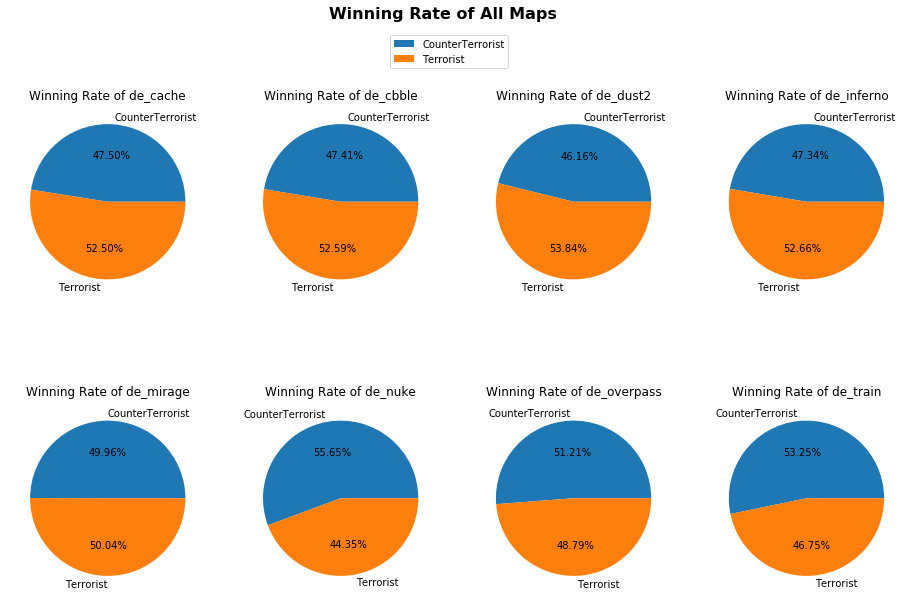

In [40]:
fig=plt.figure(figsize=(16,10))
#axes = fig.subplots(nrows=2, ncols=4)

plt.suptitle('Winning Rate of All Maps', fontsize=16, fontweight='bold')
#ËÆæÁΩÆ‰∫ÜjÂêéÈù¢‰∏ÄÊ¨°Âæ™ÁéØÁªìÊùüÂ∞±Âä†‰∏ÄÔºåÂèØ‰ª•ÂØπÂ∫îÁîªÂ∏É‰∏äÁöÑ‰ΩçÁΩÆ
j=1
#Áî®unique()ÊñπÊ≥ïÂéªÈáç
for map in map_winrate_pd.map.unique(): 
    plt.subplot(2,4,j)
    plt.title('Winning Rate of %s' % map)
    Winrate_Pie=map_winrate_pd[map_winrate_pd['map']==map]
    plt.pie(Winrate_Pie['count'],labels=Winrate_Pie['winner_side'],autopct='%1.2f%%')
    j=j+1
    
labels = map_winrate_pd['winner_side'].unique()
#plt.tight_layout()
fig.legend(labels,loc='upper center',bbox_to_anchor=(0.39, 0.8))
plt.show()

Ê≠§ÂõæË°®ÊòæÁ§∫ÁöÑÊòØÂÖ®ÈÉ®ÂõûÂêàÁöÑËÉúÁéáÔºå

$$
    \rm{Win\ Rate\ by\ round} =\frac{\rm{Win \ rounds}}{\rm{ALL \ rounds}} \tag{1}
$$

Ëã•‰ΩøÁî®Êï¥Â±ÄÊØîËµõËé∑ËÉúÂà§Êñ≠ËÉúÁéáÔºö

$$
    \rm{Win\ Rate\ by\ play} =\frac{\rm{Win \ plays}}{\rm{ALL \ plays}} \tag{2}
$$

‰∫åËÄÖÂèñÂæóÁöÑÁªìÊûúÁõ∏Â∑ÆÂú® $0.1\%$ ÂÜÖÔºåÊïÖÊú¨ËÆ∞‰∫ãÊú¨‰∏≠‰ΩøÁî®Êõ¥Â•ΩËÆ°ÁÆóÁöÑ $(1)$ ÂºèËÆ°ÁÆó

## ÁªèÊµéÁöÑÂΩ±Âìç

In [14]:
economics_RAW=meta_df.select('file', 'map', 'round','round_type','ct_eq_val','t_eq_val')
economics_RAW.show(10)

+--------------------+-----------+-----+------------+---------+--------+
|                file|        map|round|  round_type|ct_eq_val|t_eq_val|
+--------------------+-----------+-----+------------+---------+--------+
|esea_match_137709...|de_overpass|    1|PISTOL_ROUND|     4300|    4250|
|esea_match_137709...|de_overpass|    2|         ECO|     6300|   19400|
|esea_match_137709...|de_overpass|    3|    SEMI_ECO|     7650|   19250|
|esea_match_137709...|de_overpass|    4|      NORMAL|    24900|   23400|
|esea_match_137709...|de_overpass|    5|         ECO|     5400|   20550|
|esea_match_137709...|de_overpass|    6|      NORMAL|    29650|   25450|
|esea_match_137709...|de_overpass|    7|         ECO|     3200|   25300|
|esea_match_137709...|de_overpass|    8|         ECO|     4850|   27600|
|esea_match_137709...|de_overpass|    9|   FORCE_BUY|    32150|   18200|
|esea_match_137709...|de_overpass|   10|         ECO|    32950|    9950|
+--------------------+-----------+-----+-----------

‰∏ÄÂÖ±Êúâ5ÁßçÂõûÂêàÁ±ªÂûãÔºöECO„ÄÅÊâãÊû™Â±Ä„ÄÅÂçäECO„ÄÅÂº∫Âà∂Ë¥≠‰π∞„ÄÅÊ≠£Â∏∏Ôºö

In [15]:
round_type_pd=economics_RAW.groupBy('round_type').count().toPandas()
round_type_pd

round_type   count
0           ECO  128613
1  PISTOL_ROUND   28114
2      SEMI_ECO   24444
3     FORCE_BUY   40876
4        NORMAL  155582

In [17]:
print(round_type_pd.to_latex())

\begin{tabular}{llr}
\toprule
{} &    round\_type &   count \\
\midrule
0 &           ECO &  128613 \\
1 &  PISTOL\_ROUND &   28114 \\
2 &      SEMI\_ECO &   24444 \\
3 &     FORCE\_BUY &   40876 \\
4 &        NORMAL &  155582 \\
\bottomrule
\end{tabular}



In [14]:
#‰∏çÁî®ÊØèÊ¨°ÈÉΩÊâßË°åÊçè
import seaborn as sns

### ‰∏çÂêåÂõûÂêàÁ±ªÂûãÁöÑÁªüËÆ°Ôºö

Text(0.5, 0.98, 'Round Types Statistics')

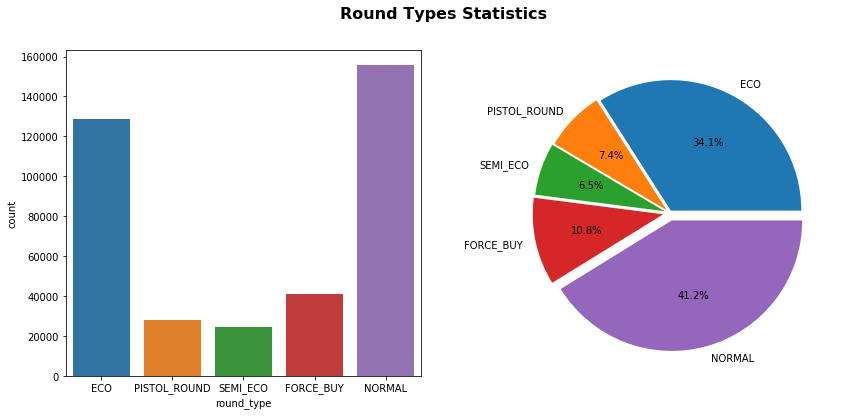

In [44]:
fig = plt.figure(figsize=(14, 6))
#ÁîªÊù°ÂΩ¢Âõæüìä
plt.subplot(1,2,1)
sns.barplot(x=round_type_pd['round_type'],y=round_type_pd['count'])
#ÁîªÈ•ºÂõæ
plt.subplot(1,2,2)
plt.pie(round_type_pd['count'],labels=round_type_pd['round_type'],autopct='%1.1f%%',explode = (0.02,0.03,0.04,0.05,0.06))
plt.suptitle('Round Types Statistics', fontsize=16, fontweight='bold')

ÂèØ‰ª•ÁúãÂá∫ÊúÄÂ§öÁöÑÂõûÂêàÊó∂Ê≠£Â∏∏ÈïøÊû™Â±ÄÔºåÂÖ∂Ê¨°Â§öÁöÑÊòØECO„ÄÇ

 ‰∏çÂêåÂ±ÄÂØπÂ∫îÁöÑÁªèÊµéÔºö

ÂºïÁî®ÁîªÂõæÁöÑ‰ª£Á†ÅÔºö

> ```python
fig = plt.figure(figsize=(10, 5))
sns.kdeplot(weapon_events['ct_eq_val'].rename('Counter-Terrorists'))
sns.kdeplot(weapon_events['t_eq_val'].rename('Terrorists'))
plt.suptitle("Team Round Spend Values")
>```

### T‰∏éCTÁöÑÁªèÊµéÂØπÊØî

ÁîªÂõæÔºö

In [45]:
#ÊòæÁ§∫ÂêÑround_typeÁöÑTÂíåCTÁöÑÁªèÊµé
eco_pd=economics_RAW.select('round_type','ct_eq_val','t_eq_val').\
orderBy('t_eq_val',ascending=0 ).toPandas()
eco_pd

round_type  ct_eq_val  t_eq_val
0          FORCE_BUY      19750     38150
1             NORMAL      33700     37900
2             NORMAL      29550     37400
3          FORCE_BUY      19450     36950
4             NORMAL      29500     36900
5                ECO      10200     36700
6             NORMAL      34200     36450
7             NORMAL      30850     36350
8          FORCE_BUY      18800     36350
9             NORMAL      26350     36250
10            NORMAL      28650     36100
11               ECO       4250     36100
12            NORMAL      22000     36100
13            NORMAL      34650     36100
14         FORCE_BUY      20400     36050
15               ECO       8350     35950
16               ECO      12550     35900
17         FORCE_BUY      19250     35900
18         FORCE_BUY      21450     35850
19            NORMAL      33600     35750
20               ECO      10750     35750
21               ECO       2900     35700
22            NORMAL      25250     35650
23            NORMAL      32400     35500
24               ECO       8350     35450
25            NORMAL      23600     35400
26         FORCE_BUY      20900     35400
27               ECO       3650     35350
28            NORMAL      32600     35250
29          SEMI_ECO      15750     35250
...              ...        ...       ...
377599           ECO      24050       800
377600           ECO      21900       800
377601           ECO      23000       800
377602           ECO      25100       800
377603           ECO      24550       800
377604           ECO      15000       800
377605           ECO      27600       800
377606           ECO      21250       800
377607           ECO      17400       800
377608           ECO      24550       800
377609  PISTOL_ROUND      22550       800
377610           ECO      25650       800
377611           ECO      27800       800
377612           ECO      13300       800
377613           ECO      20850       800
377614           ECO      21500       800
377615           ECO      29800       800
377616           ECO      22700       800
377617           ECO      35650       800
377618           ECO      14050       800
377619           ECO      25100       800
377620           ECO      19250       800
377621           ECO      24550       800
377622           ECO      29550       800
377623           ECO      21550       800
377624           ECO      27900       600
377625           ECO      31950       600
377626  PISTOL_ROUND       3600       400
377627           ECO      31450       400
377628           ECO      35800       400

[377629 rows x 3 columns]

Ê†πÊçÆÁªèÊµéÊï∞ÊçÆÔºåÁîªÊ¶ÇÁéáÂàÜÂ∏ÉÂõæÔºö

**ÔºàËøôÈÉ®ÂàÜË¶ÅÊòØÂõæÂ§™Â§ßÔºåÂ∞±‰∏çÈÄÉËøôÊ†∑Â•óÂ≠êÂõæ‰∫ÜÔºåÂ∞±ÂàÜÂºÄ‰∏§‰∏™ÂõæÁîªÔºâ**

Text(0.5, 0.98, 'Economics Distribution Estimation')

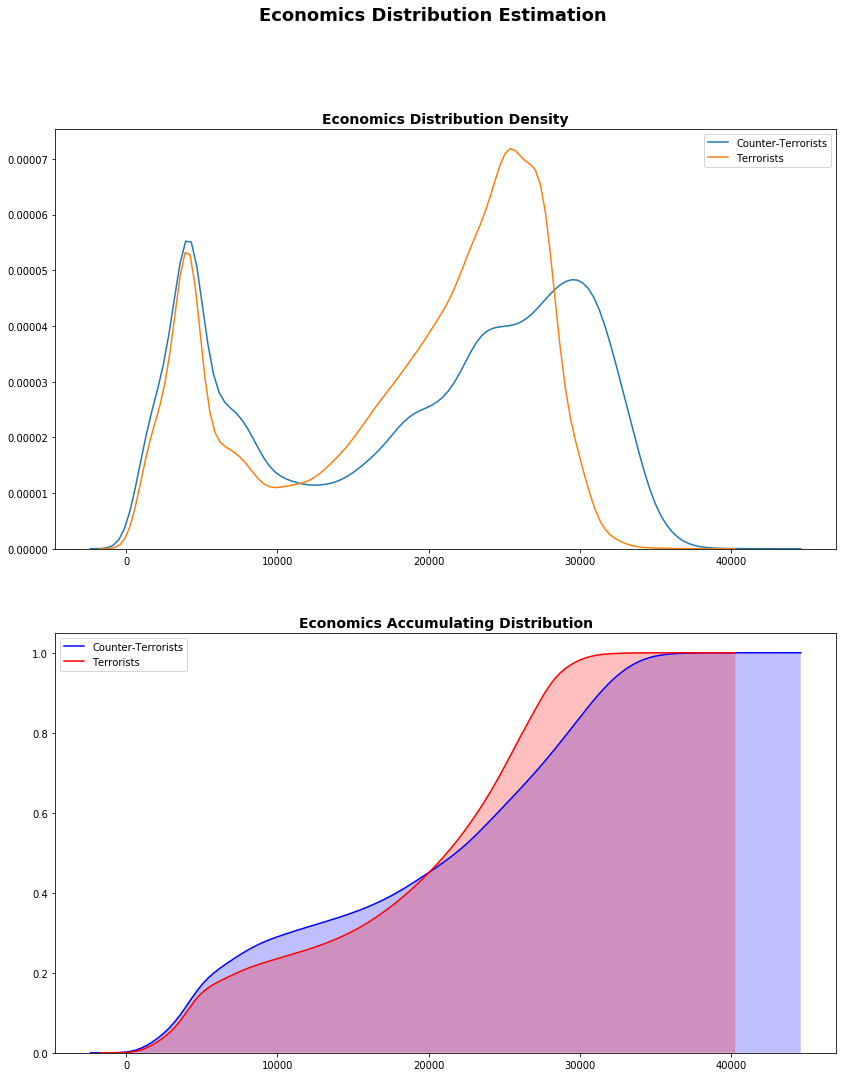

In [46]:
fig = plt.figure(figsize=(14, 17))

#ÁîªÊ¶ÇÁéáÂØÜÂ∫¶ÂáΩÊï∞
plt.subplot(2,1,1)
plt.title('Economics Distribution Density', fontsize=14, fontweight='bold')
sns.kdeplot(eco_pd['ct_eq_val'].rename('Counter-Terrorists'))
sns.kdeplot(eco_pd['t_eq_val'].rename('Terrorists'))


#ÁîªÊ¶ÇÁéáÂàÜÂ∏ÉÂáΩÊï∞
plt.subplot(2,1,2)
plt.title('Economics Accumulating Distribution', fontsize=14, fontweight='bold')
sns.kdeplot(eco_pd['ct_eq_val'].rename('Counter-Terrorists'),cumulative=True,shade=True,color='blue')
sns.kdeplot(eco_pd['t_eq_val'].rename('Terrorists'),cumulative=True,shade=True,color='red')

plt.suptitle('Economics Distribution Estimation', fontsize=18, fontweight='bold')

‰∏äÂõæ‰∏∫TÂíåCTÁöÑ**ÁªèÊµéÊ¶ÇÁéáÂØÜÂ∫¶**ÂàÜÂ∏É‰º∞ËÆ°Êõ≤Á∫øÔºåÁî±Ê≠§ÂõæÂèØ‰ª•ÁúãÂá∫CTÁöÑÊúÄÈ´òÁªèÊµéË¶ÅÈ´ò‰∫éTÁöÑÁªèÊµé„ÄÇ

TÂíåCTÂùáÂÄæÂêë‰∫éË¥≠‰π∞‚ÄúÂæàÂ∞ëÁöÑË£ÖÂ§á‚ÄùÊàñÊòØ‚ÄúÂæàÂ§öÁöÑË£ÖÂ§á‚ÄùÔºå

Âú®‰ΩéÁªèÊµéÈò∂ÊÆµÔºàECOÔºâÔºåT‰∏éCTÁªèÊµéÁöÑÊúÄÊ¶ÇÁÑ∂ÁªèÊµéÂÄºÂü∫Êú¨Áõ∏ÂêåÔºõ

Âú®È´òÁªèÊµéÈò∂ÊÆµÔºàË∂ÖËøá\$ 20000ÔºâÔºåCTÁöÑÊúÄÊ¶ÇÁÑ∂ÁªèÊµéÂÄºË¶ÅÈ´ò‰∫éTÁöÑÁªèÊµéÔºåËøô‰πüÂèØËÉΩÊòØCTÁöÑË£ÖÂ§á‰ª∑Ê†ºË¶ÅÈ´ò‰∫éT

Áî±‰∏ãÂõæÁöÑ**ÁªèÊµéÁ¥ØÁßØÂàÜÂ∏É**‰º∞ËÆ°Êõ≤Á∫ø‰πüÂèØÂêåÊ†∑ÁúãÂá∫Ê≠§ËßÑÂæã„ÄÇ

> Ê≠£Â¶Ç‰Ω†ÊâÄÁúãÂà∞ÁöÑÔºåÂõ¢ÈòüÈùûÂ∏∏ÂÄæÂêë‰∫éË¥≠‰π∞‚ÄúÂá†‰πéÊ≤°Êúâ‚ÄùÊàñ‚ÄúÂæàÂ§ö‚ÄùÁöÑË£ÖÂ§á„ÄÇ ÊúâË∂£ÁöÑÊòØÔºåÂú®Ë¥≠‰π∞ÂõûÂêà‰∏≠ÔºåÂèçÊÅêÁ≤æËã±ÁöÑËä±Ë¥πÂæÄÂæÄÊØîÊÅêÊÄñÂàÜÂ≠êÁï•È´òÔºåËøôÂèØËÉΩÊòØÂõ†‰∏∫‰ªñ‰ª¨ÂØπÂèØ‰ª•Ë¥≠‰π∞ÁöÑÊúÄÂ§ßË£ÖÂ§áÊï∞ÈáèÊúâÊõ¥È´òÁöÑÈôêÂà∂„ÄÇ

ÁªüËÆ°‰ø°ÊÅØÔºö

**ÁîªÁÆ±Á∫øÂõæ**

Text(0.5, 0.98, 'Economics Statiscs')

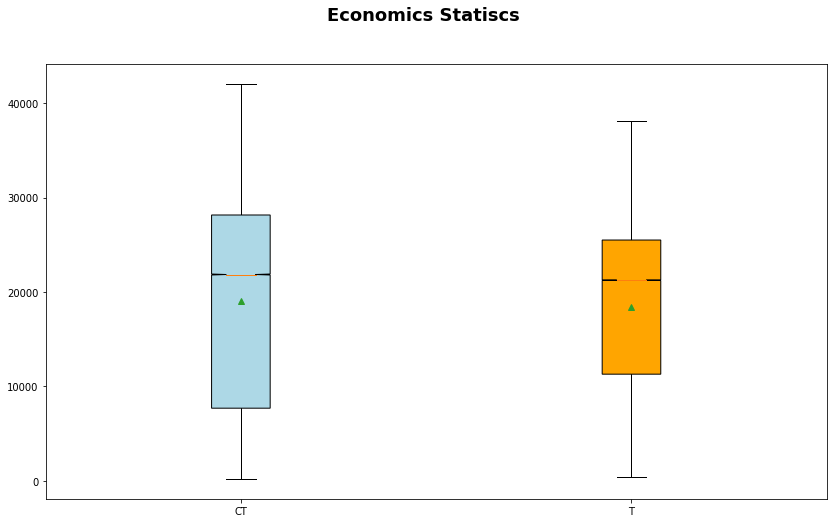

In [47]:
fig = plt.figure(figsize=(14, 8))

#ÁîªÁÆ±Á∫øÂõæ
bplot=plt.boxplot([eco_pd['ct_eq_val'],eco_pd['t_eq_val']],
                patch_artist=True,
                boxprops={'color': 'black'},
                notch=True, 
                showmeans=True,
                labels=['CT', 'T'])
colors = ['lightblue','orange']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.suptitle('Economics Statiscs', fontsize=18, fontweight='bold')

CTÁöÑÁªèÊµéÈ´ò‰∫éTÁöÑÁªèÊµéÔºåÂêåÊó∂Ê≥¢Âä®ÊÄß‰πüÊõ¥Â§ßÔºåÊõ¥ÂÆπÊòìECOÔºåËøôÊòØÊ∏∏ÊàèÊú∫Âà∂ÊâÄËÆæËÆ°ÁöÑ„ÄÇ

> Ë≠¶ÂØüÁªèÊµéÊó†ËÆ∫ÊòØ‰∏≠‰ΩçÊï∞ËøòÊòØÂπ≥ÂùáÂÄºÔºåÈÉΩË¶ÅÊØîÂúüÂå™ÁªèÊµéÈ´ò‰∏ÄÁÇπÁÇπÔºåËøôÂíåÊ∏∏ÊàèÊú∫Âà∂ÊúâÂÖ≥„ÄÇËÄå‰∏îÊòéÊòæÁúãÂá∫ÔºåË≠¶ÂØüÁªèÊµéÁöÑÊ≥¢Âä®Êõ¥Âº∫„ÄÇ‰∏∫‰ΩïÂç∞Ë±°‰∏≠ÂÅöÂúüÂå™ÂèØ‰ª•ÊääÊääÂàöÊû™Ôºü‰∏∫‰ΩïÂÅöË≠¶ÂØüÁªèÂ∏∏ECOÔºüÁªìÊûúËØ¥ÊòéÔºåË≠¶ÂØüË¶ÅÊéßÂà∂ÁªèÊµéÔºåÂ∞±ÊØîÂúüÂå™Èöæ„ÄÇ

### ÁªèÊµé‰∏éÈÅìÂÖ∑‰ΩøÁî®ÁöÑÂÖ≥Á≥ª

Êàë‰ª¨ËÄÉËôëÔºö

- ÁªèÊµéË∂äÈ´òÔºåË∂äÂ§ö‰ΩøÁî®ÈÅìÂÖ∑

- ÁªèÊµéË∂äÈ´òÔºåËÉúÁéáË∂äÈ´òÔºü

### ÁªèÊµé‰∏éTÂíåCTËÉúÁéáÁöÑÂÖ≥Á≥ª

Áõ∏ÂÖ≥ÊÄßÂàÜÊûê„ÄÇ

# dmgË°®ÂàÜÊûê

## Ê≠¶Âô®‰º§ÂÆ≥ÊéíË°åÊ¶ú



‰∏ÄÂÖ±Êúâ8ÁßçÊ≠¶Âô®Á±ªÂûãÔºåÂáªÊùÄËÆ∞ÂΩïÊúÄÂ§öÁöÑÊòØÈïøÊû™

In [18]:
#ÂàóÂá∫‰∏çÂêå‰º§ÂÆ≥ÁöÑÊ≠¶Âô®Á±ªÂûã
ddpd=dmg_df.select('wp_type').groupBy('wp_type').count().orderBy('count',ascending=0 ).toPandas()
ddpd

wp_type    count
0      Rifle  5338372
1     Pistol  2070588
2    Grenade  1280516
3        SMG  1133901
4     Sniper   490912
5      Heavy   110201
6     Unkown   103280
7  Equipment    10412

In [19]:
print(ddpd.to_latex())

\begin{tabular}{llr}
\toprule
{} &    wp\_type &    count \\
\midrule
0 &      Rifle &  5338372 \\
1 &     Pistol &  2070588 \\
2 &    Grenade &  1280516 \\
3 &        SMG &  1133901 \\
4 &     Sniper &   490912 \\
5 &      Heavy &   110201 \\
6 &     Unkown &   103280 \\
7 &  Equipment &    10412 \\
\bottomrule
\end{tabular}



ÁªüËÆ°‰∏çÂêåÁ±ªÂûãÊ≠¶Âô®ÁöÑÊÄª‰º§ÂÆ≥ÈáèÔºö

‰ΩøÁî®Data FrameÔºö

In [19]:
#‰ª•wp_typeÂå∫ÂàÜÁöÑ‰º§ÂÆ≥ÔºåÂπ∂ËÆ°ÁÆóÊÄª‰º§ÂÆ≥
dmg_wp_list=dmg_df.select('wp','wp_type','hitbox','hp_dmg','arm_dmg',(dmg_df.hp_dmg+dmg_df.arm_dmg).alias("tot_dmg")).\
                    orderBy('wp_type')
#dmg_wp_list.show(50)

### ‰∏çÂêåÊ≠¶Âô®Á±ªÂûã `wp_type`

ÁΩë‰∏äÊü•Âà∞ÁöÑÊ±ÇÂíåÊñπÂºèÔºåÂ∑≤ÂºÉÁî®„ÄÇ

>```python
>#from pyspark.sql import functions as fn
>#from pyspark.sql import Window
>win = Window.orderBy('wp_type')
>dmg_df_tmp = dmg_wp_type_list.withColumn('sum_of_hp_dmg', fn.sum(dmg_wp_type_list['hp_dmg']).over(win))
>```

ÂàÜÁªÑÊ±ÇÂíåÔºö

In [20]:
dmg_wp_type_sum=dmg_wp_list.groupBy('wp_type').agg({'hp_dmg': 'sum', 'arm_dmg': 'sum','tot_dmg': 'sum'}).\
                withColumnRenamed("sum(tot_dmg)", "tot_dmg").\
                withColumnRenamed("sum(hp_dmg)", "hp_dmg").\
                withColumnRenamed("sum(arm_dmg)", "arm_dmg").\
                orderBy('tot_dmg',ascending=0)
dmg_wp_type_sum_pd=dmg_wp_type_sum.toPandas()
dmg_wp_type_sum_pd

wp_type      tot_dmg       hp_dmg     arm_dmg
0      Rifle  177745516.0  156448524.0  21296992.0
1     Pistol   76737824.0   67355345.0   9382479.0
2     Sniper   39695267.0   38710578.0    984689.0
3        SMG   27397275.0   23032905.0   4364370.0
4    Grenade   15249803.0   13021114.0   2228689.0
5      Heavy    2325035.0    2039414.0    285621.0
6     Unkown    1854692.0    1295327.0    559365.0
7  Equipment     583514.0     543252.0     40262.0

In [17]:
print(dmg_wp_type_sum_pd.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &    wp\_type &      tot\_dmg &       hp\_dmg &     arm\_dmg \\
\midrule
0 &      Rifle &  177745516.0 &  156448524.0 &  21296992.0 \\
1 &     Pistol &   76737824.0 &   67355345.0 &   9382479.0 \\
2 &     Sniper &   39695267.0 &   38710578.0 &    984689.0 \\
3 &        SMG &   27397275.0 &   23032905.0 &   4364370.0 \\
4 &    Grenade &   15249803.0 &   13021114.0 &   2228689.0 \\
5 &      Heavy &    2325035.0 &    2039414.0 &    285621.0 \\
6 &     Unkown &    1854692.0 &    1295327.0 &    559365.0 \\
7 &  Equipment &     583514.0 &     543252.0 &     40262.0 \\
\bottomrule
\end{tabular}



ÁîªÂõæËØ¥Êòé‰∏çÂêåÊ≠¶Âô®Á±ªÂûãÁöÑ**‰º§ÂÆ≥Èáè**ÊéíÂêçÔºö

Text(0.5, 0.98, 'Weapon Type Demage Counting')

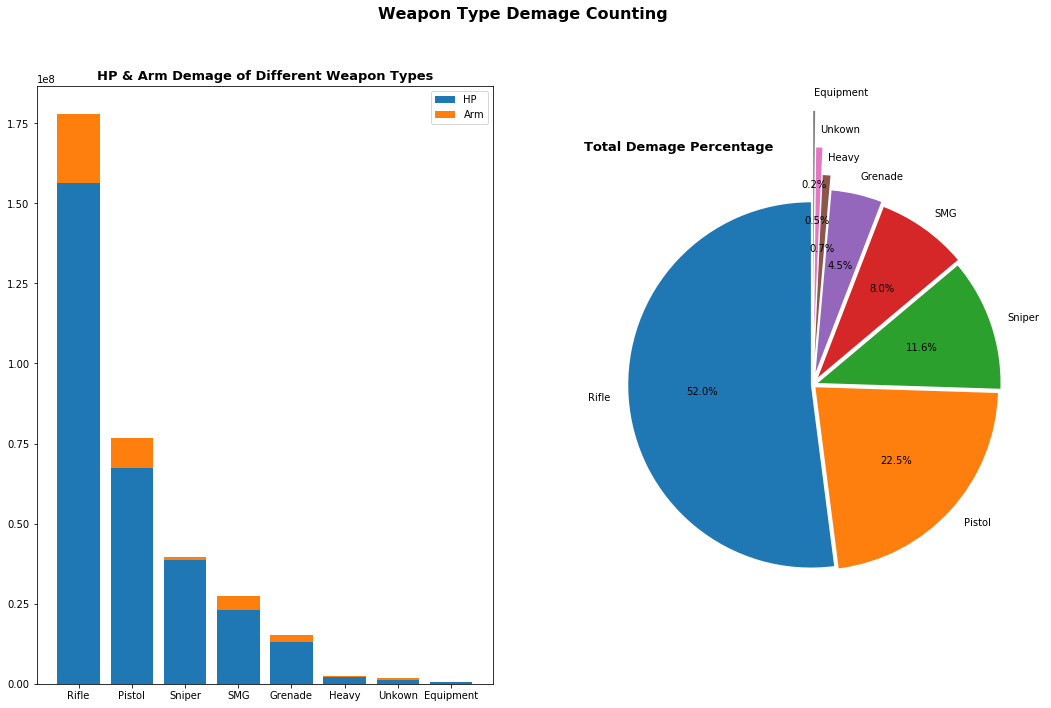

In [51]:
from matplotlib import ticker
fig = plt.figure(figsize=(18, 11))
plt.subplot(1,2,1)
plt.title('HP & Arm Demage of Different Weapon Types', fontsize=13, fontweight='bold')

"""
sns.barplot(y=dmg_wp_type_sum_pd['wp_type'],x=[dmg_wp_type_sum_pd['hp_dmg'],\
                                               dmg_wp_type_sum_pd['arm_dmg'],\
                                               dmg_wp_type_sum_pd['tot_dmg']])
"""
plt.bar(dmg_wp_type_sum_pd['wp_type'], dmg_wp_type_sum_pd['hp_dmg'], label='HP')
plt.bar(dmg_wp_type_sum_pd['wp_type'], dmg_wp_type_sum_pd['arm_dmg'], bottom=dmg_wp_type_sum_pd['hp_dmg'], label='Arm')
plt.legend()

#plt.bar(dmg_wp_type_sum_pd['hp_dmg'],dmg_wp_type_sum_pd['wp_type'], label='HP')
#plt.bar(dmg_wp_type_sum_pd['arm_dmg'],dmg_wp_type_sum_pd['wp_type'],left=dmg_wp_type_sum_pd['hp_dmg'], label='Arm')
#plt.legend()
#.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

plt.subplot(1,2,2)
plt.title('Total Demage Percentage', fontsize=13, fontweight='bold',loc="left")
plt.pie(dmg_wp_type_sum_pd['tot_dmg'],labels=dmg_wp_type_sum_pd['wp_type'],startangle=90,autopct='%1.1f%%',explode = (0.01,0.02,0.03,0.05,0.07,0.15,0.3,0.5))
plt.suptitle('Weapon Type Demage Counting', fontsize=16, fontweight='bold')

ÂèØ‰ª•ÁúãÂà∞ÔºåÈïøÊû™ÂØπ‰∫éÁîüÂëΩÂÄºÔºàHPÔºâËøòÊòØÊä§Áî≤ÔºàArmÔºâÁöÑÊçü‰º§ÂùáÊòØÊúÄÈ´òÁöÑÔºåÂÖ∂Ê¨°ÊòØÊâãÊû™Ôºå‰πãÂêé‰æùÊ¨°ÊòØÁãôÂáªÊû™„ÄÅÂÜ≤ÈîãÊû™„ÄÅÈÅìÂÖ∑„ÄÅÈáçÊ≠¶Âô®ÂíåË£ÖÂ§á„ÄÇ

Text(0.5, 0.98, 'Weapon Type Demage On HP & Arm')

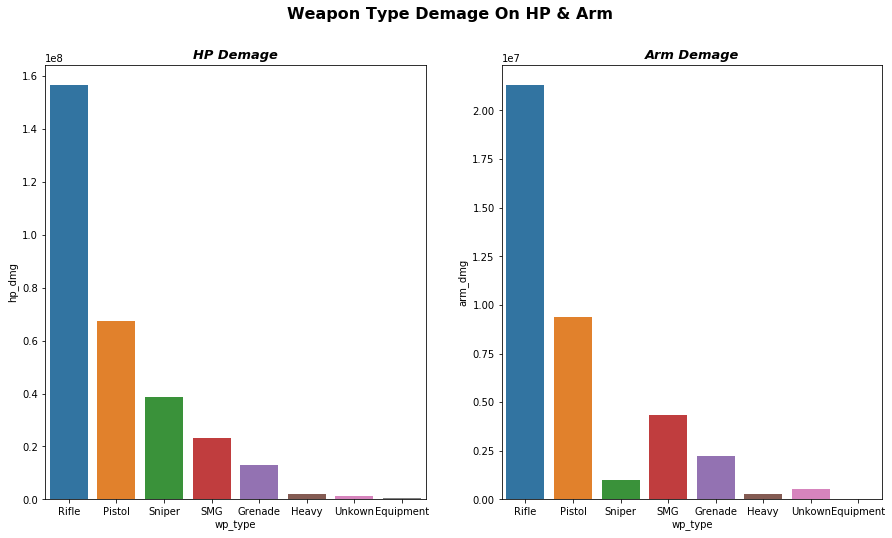

In [52]:
fig = plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.title('HP Demage', fontsize=13, fontweight='bold',fontstyle='italic')
sns.barplot(x=dmg_wp_type_sum_pd['wp_type'],y=dmg_wp_type_sum_pd['hp_dmg'])
plt.subplot(1,2,2)
plt.title('Arm Demage', fontsize=13, fontweight='bold',fontstyle='italic')
sns.barplot(x=dmg_wp_type_sum_pd['wp_type'],y=dmg_wp_type_sum_pd['arm_dmg'])
                                             
#plt.bar(dmg_wp_type_sum_pd['wp_type'], dmg_wp_type_sum_pd['hp_dmg'], label='HP')
#plt.bar(dmg_wp_type_sum_pd['wp_type'], dmg_wp_type_sum_pd['arm_dmg'], bottom=dmg_wp_type_sum_pd['hp_dmg'], label='Arm')
#plt.legend()

plt.suptitle('Weapon Type Demage On HP & Arm', fontsize=16, fontweight='bold')

ÂØπÊä§Áî≤ÁöÑ‰º§ÂÆ≥ÊúÄÂ§öÁöÑÊòØÈïøÊû™Ôºå‰πãÂêé‰æùÊ¨°ÊòØÊâãÊû™„ÄÅÂÜ≤ÈîãÊû™„ÄÅÈÅìÂÖ∑„ÄÅÁãôÂáªÊû™„ÄÅÈáçÊ≠¶Âô®ÂíåË£ÖÂ§á„ÄÇ

ÂÄºÂæóÊ≥®ÊÑèÁöÑÊòØÔºåÂÜ≤ÈîãÊû™ÂØπÊä§Áî≤ÈÄ†ÊàêÁöÑ‰º§ÂÆ≥Ë¶ÅÈ´ò‰∫éÂØπHPÁöÑ‰º§ÂÆ≥ÔºåÂèØËÉΩÊòØ‰ΩøÁî®ÂÜ≤ÈîãÊû™ÁöÑÁé©ÂÆ∂Êõ¥‰π†ÊÉØ‰∫éÂÜ≤ÈîãÔºåÂØπÂ§öÂêçÊïå‰∫∫ÈÄ†Êàê‰∏çËá¥ÂëΩÁöÑ‰º§ÂÆ≥„ÄÇ

ÁãôÂáªÊû™ÂØπHPÈÄ†Êàê‰º§ÂÆ≥ËæÉÂ§öÔºå‰ΩÜÂØπ‰∫éÊä§Áî≤‰º§ÂÆ≥ËæÉ‰ΩéÔºåËøô‰ΩìÁé∞‰∫Ü‰∏ÄÊû™ÊØôÂëΩÁöÑÁâπÁÇπ„ÄÇ

### ‰∏çÂêåÊ≠¶Âô® `wp`

‰∏ÄÂÖ±ÊúâËøô‰πàÂ§öÁßçÊ≠¶Âô®Ôºö

In [12]:
dmg_count=dmg_df.select('wp','wp_type','hp_dmg','arm_dmg').groupBy('wp_type','wp').count().orderBy('wp_type').toPandas()
dmg_count

wp_type            wp    count
0   Equipment         Knife     8673
1   Equipment          Bomb        1
2   Equipment          Zeus     1738
3     Grenade         Smoke    10237
4     Grenade         Flash     5664
5     Grenade         Decoy        8
6     Grenade            HE   469987
7     Grenade       Molotov    11732
8     Grenade    Incendiary   782888
9       Heavy      SawedOff     4126
10      Heavy         Swag7    38449
11      Heavy          M249      654
12      Heavy          Nova    17900
13      Heavy        XM1014    40529
14      Heavy         Negev     8543
15     Pistol         P2000    56231
16     Pistol         Glock   435716
17     Pistol           USP   462254
18     Pistol  DualBarettas     9659
19     Pistol          Tec9     9786
20     Pistol     FiveSeven    80439
21     Pistol            CZ   340874
22     Pistol        Deagle   426307
23     Pistol          P250   249322
24      Rifle          AK47  3115867
25      Rifle         SG556    18890
26      Rifle           AUG    24122
27      Rifle        Gallil    98004
28      Rifle         Famas   249257
29      Rifle          M4A1   368527
30      Rifle          M4A4  1463705
31        SMG           MP7   427649
32        SMG         Bizon    10480
33        SMG           P90    71122
34        SMG           UMP   208544
35        SMG           MP9   197649
36        SMG         Mac10   218457
37     Sniper         G3SG1     3189
38     Sniper        Scar20     7870
39     Sniper           AWP   415525
40     Sniper         Scout    64328
41     Unkown       Unknown   103280

ËÆ°ÁÆó‰∏çÂêåÊ≠¶Âô® `wp` ÁöÑ‰º§ÂÆ≥ÊÄªÈáèÔºö

In [7]:
dmg_wp_sum=dmg_wp_list.groupBy('wp').agg({'hp_dmg': 'sum', 'arm_dmg': 'sum','tot_dmg': 'sum'}).\
                withColumnRenamed("sum(tot_dmg)", "tot_dmg").\
                withColumnRenamed("sum(hp_dmg)", "hp_dmg").\
                withColumnRenamed("sum(arm_dmg)", "arm_dmg").\
                orderBy('tot_dmg',ascending=0)
dmg_wp_sum_pd=dmg_wp_sum.toPandas()
dmg_wp_sum_pd

wp      tot_dmg      hp_dmg     arm_dmg
0           AK47  109725947.0  98743694.0  10982253.0
1           M4A4   45141653.0  38014304.0   7127349.0
2            AWP   34445328.0  34013206.0    432122.0
3         Deagle   20967316.0  20171835.0    795481.0
4            USP   17441255.0  14527886.0   2913369.0
5          Glock   13562451.0  11582232.0   1980219.0
6           M4A1   11662392.0   9805285.0   1857107.0
7             HE   11262324.0   9033918.0   2228406.0
8             CZ   10135325.0   8941360.0   1193965.0
9            MP7    9900292.0   8372636.0   1527656.0
10          P250    9383852.0   7419927.0   1963925.0
11         Famas    7048810.0   6022529.0   1026281.0
12           UMP    5582052.0   4699330.0    882722.0
13         Mac10    5329044.0   4455269.0    873775.0
14           MP9    4767964.0   3940245.0    827719.0
15         Scout    4642997.0   4158674.0    484323.0
16    Incendiary    3954677.0   3954677.0         0.0
17        Gallil    2906578.0   2629004.0    277574.0
18     FiveSeven    2515889.0   2412482.0    103407.0
19         P2000    2104648.0   1744828.0    359820.0
20       Unknown    1854692.0   1295327.0    559365.0
21           P90    1590650.0   1376481.0    214169.0
22         Swag7     851699.0    761738.0     89961.0
23        XM1014     709763.0    662816.0     46947.0
24           AUG     660421.0    633993.0     26428.0
25         SG556     599715.0    599715.0         0.0
26         Knife     433870.0    393608.0     40262.0
27        Scar20     432829.0    382646.0     50183.0
28          Nova     392664.0    289229.0    103435.0
29  DualBarettas     316261.0    255839.0     60422.0
30          Tec9     310827.0    298956.0     11871.0
31         Negev     244431.0    211055.0     33376.0
32         Bizon     227273.0    188944.0     38329.0
33         G3SG1     174113.0    156052.0     18061.0
34          Zeus     149643.0    149643.0         0.0
35      SawedOff     106787.0     96800.0      9987.0
36          M249      19691.0     17776.0      1915.0
37       Molotov      14093.0     14093.0         0.0
38         Smoke      11911.0     11780.0       131.0
39         Flash       6790.0      6638.0       152.0
40         Decoy          8.0         8.0         0.0
41          Bomb          1.0         1.0         0.0

ÁîªÂõæÊòæÁ§∫ÂÖ®ÈÉ®Ôºö

Text(0.5, 1.0, 'Damages from Different Weapon')

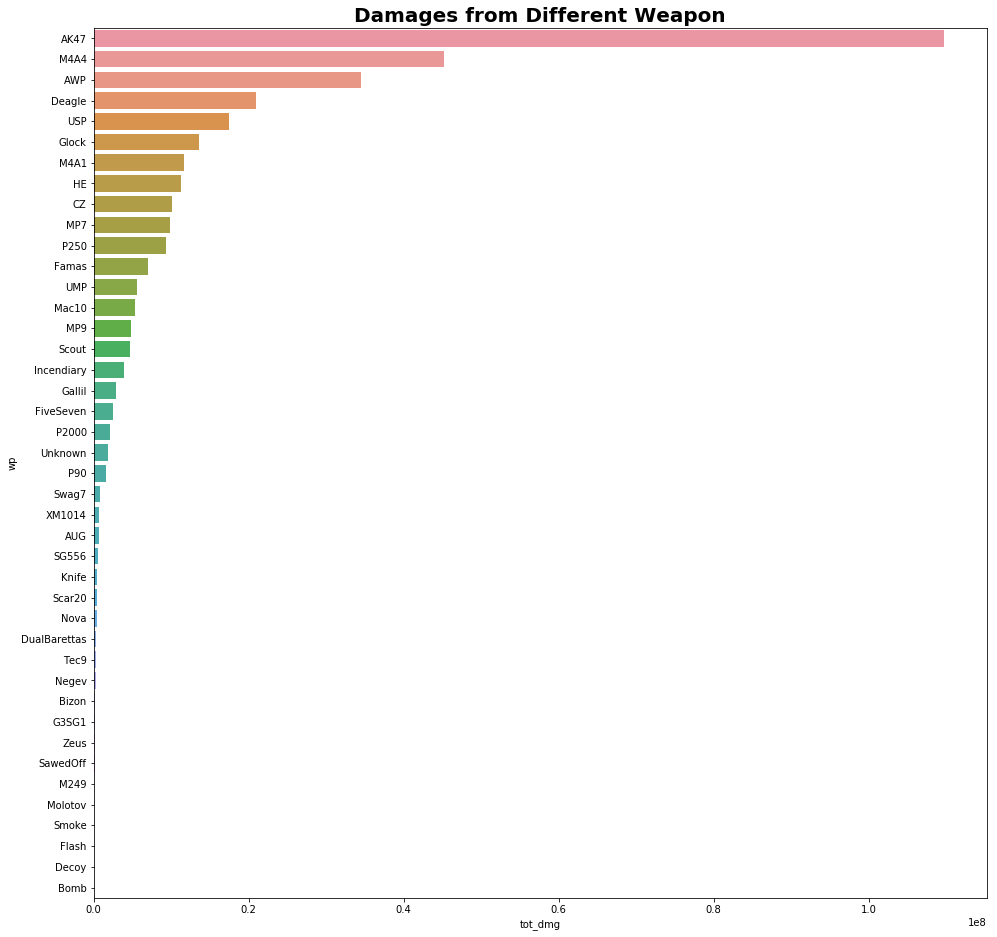

In [36]:
#ÁîªÂõæÊòæÁ§∫‰∏çÂêåÊ≠¶Âô®ÈÄ†ÊàêÁöÑ‰º§ÂÆ≥
fig = plt.figure(figsize=(16, 16))
sns.barplot(y=dmg_wp_sum_pd['wp'],\
            x=dmg_wp_sum_pd['tot_dmg'],\
            )

plt.title('Damages from Different Weapon', fontsize=20, fontweight='bold')

([<matplotlib.patches.Wedge at 0x7f4bbad5c390>,
 [Text(-1.107732539722207, -0.07091276641472334, 'Rifle'),
  Text(0.8292104888269689, -0.752867827191028, 'Pistol'),
  Text(1.067682734596699, 0.37007239594992086, 'Sniper'),
  Text(0.66827687028211, 0.9358985119370306, 'SMG'),
  Text(0.2643035117218083, 1.1397559623408515, 'Grenade'),
  Text(0.08272889081862808, 1.2472593678236776, 'Heavy'),
  Text(0.03890180929940843, 1.3994594132139855, 'Unkown'),
  Text(0.008586211791186158, 1.5999769613863437, 'Equipment')],
 [Text(-0.6087539182257173, -0.038970078840523635, '52.0%'),
  Text(0.4590272348863577, -0.4167661186236047, '22.5%'),
  Text(0.5952567458370975, 0.2063235481844691, '11.6%'),
  Text(0.37772170928988824, 0.5289861154426694, '8.0%'),
  Text(0.15135329303727485, 0.6526807647592908, '4.5%'),
  Text(0.04963733449117684, 0.7483556206942065, '0.7%'),
  Text(0.025008305978191134, 0.8996524799232762, '0.5%'),
  Text(0.005903020606440483, 1.0999841609531111, '0.2%')])

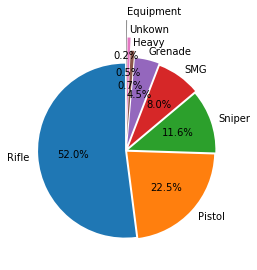

In [56]:
plt.pie(dmg_wp_type_sum_pd['tot_dmg'],labels=dmg_wp_type_sum_pd['wp_type'],startangle=90,autopct='%1.1f%%',explode = (0.01,0.02,0.03,0.05,0.07,0.15,0.3,0.5))


Text(0.5, 1.0, 'Damages from Different Weapon')

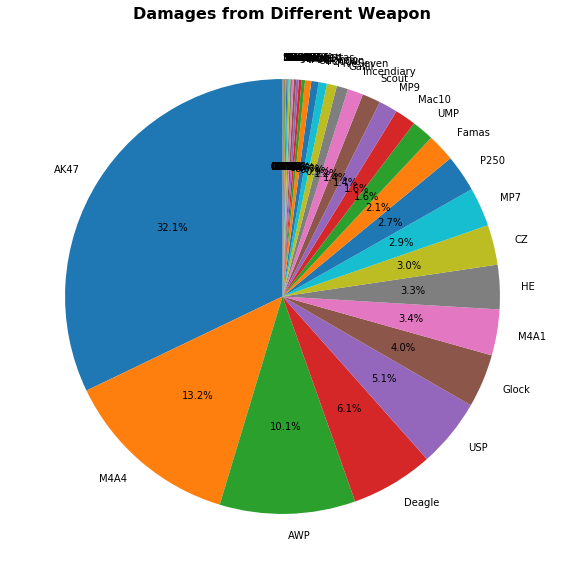

In [32]:
#ÁîªÂõæÊòæÁ§∫‰∏çÂêåÊ≠¶Âô®ÈÄ†ÊàêÁöÑ‰º§ÂÆ≥
fig = plt.figure(figsize=(10, 10))
#plt.title('Demages from Different Weapon', fontsize=13, fontweight='bold')

plt.pie(dmg_wp_sum_pd['tot_dmg'],labels=dmg_wp_sum_pd['wp'],\
        startangle=90,autopct='%1.1f%%')#,explode = (0.01,0.02,0.03,0.05,0.07,0.15,0.3,0.5))

plt.title('Damages from Different Weapon', fontsize=16, fontweight='bold')

In [58]:
dmg_wp_sum_pd.head(10)

wp      tot_dmg      hp_dmg     arm_dmg
0    AK47  109725947.0  98743694.0  10982253.0
1    M4A4   45141653.0  38014304.0   7127349.0
2     AWP   34445328.0  34013206.0    432122.0
3  Deagle   20967316.0  20171835.0    795481.0
4     USP   17441255.0  14527886.0   2913369.0
5   Glock   13562451.0  11582232.0   1980219.0
6    M4A1   11662392.0   9805285.0   1857107.0
7      HE   11262324.0   9033918.0   2228406.0
8      CZ   10135325.0   8941360.0   1193965.0
9     MP7    9900292.0   8372636.0   1527656.0

ÁîªÂõæÊòæÁ§∫Ââç10ÂêçÂíåÂêé10ÂêçÔºö

Text(0.5, 0.98, 'Zoom of Weapon Dameges')

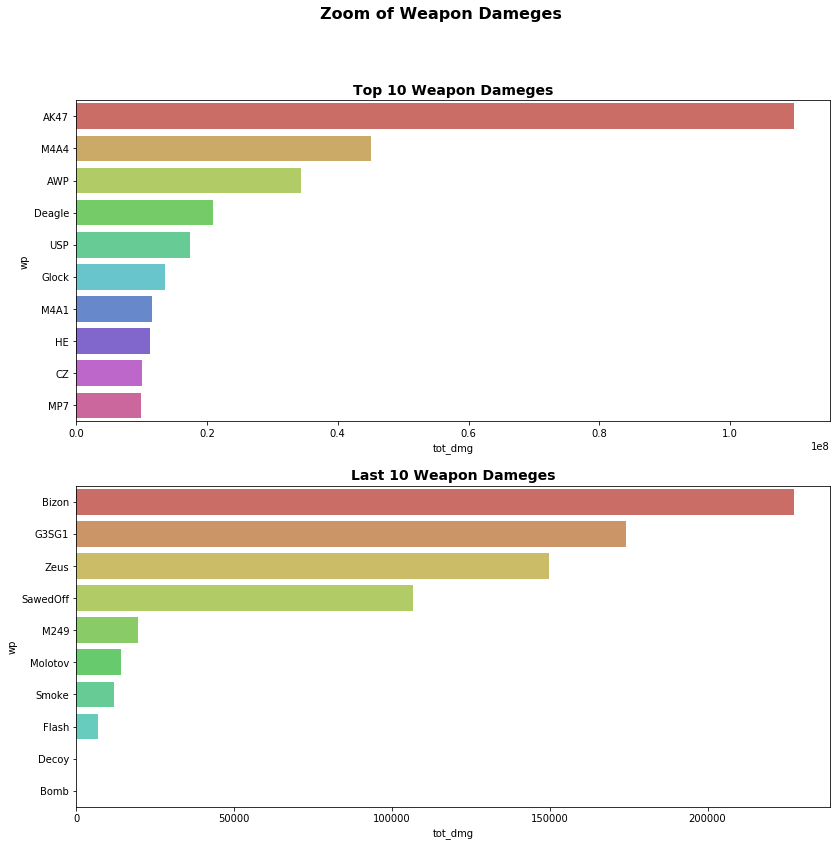

In [59]:
#ÁîªÂõæÊòæÁ§∫‰∏çÂêåÊ≠¶Âô®ÈÄ†ÊàêÁöÑ‰º§ÂÆ≥
fig = plt.figure(figsize=(13.5, 13))
plt.subplot(2,1,1)
plt.title('Top 10 Weapon Dameges', fontsize=14, fontweight='bold')
sns.barplot(y=dmg_wp_sum_pd.head(10)['wp'],\
            x=dmg_wp_sum_pd.head(10)['tot_dmg'],\
            palette=sns.color_palette("hls", 10)\
            )
plt.subplot(2,1,2)
plt.title('Last 10 Weapon Dameges', fontsize=14, fontweight='bold')
sns.barplot(y=dmg_wp_sum_pd.tail(10)['wp'],\
            x=dmg_wp_sum_pd.tail(10)['tot_dmg'],\
            palette=sns.color_palette("hls", 15)\
            )
plt.suptitle('Zoom of Weapon Dameges', fontsize=16, fontweight='bold')

ÂèØ‰ª•ÁúãÂá∫ÔºåÊúÄÂèóÊ¨¢ËøéÁöÑÊòØAK47Ôºå„ÄÇ„ÄÇ„ÄÇ„ÄÇ„ÄÇ

‰∏ãÈù¢Âà†ÊéâÔºÅ

In [60]:
#'file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted, 
#bomb_site,hitbox,wp,wp_type,[att_id,att_rank,vic_id,vic_rank],att_pos_x,att_pos_y,vic_pos_x,vic_pos_y'

#dmg_wp_list=dmg_df.select('wp','wp_type','hp_dmg','arm_dmg').orderBy('wp_type')
#dmg_wp_list.show(50)

### ‰º§ÂÆ≥ÈÉ®‰ΩçÊéíË°å

Âáª‰º§ÈÉ®‰ΩçÊúâÂì™Âá†ÁßçÔºö

hitbox


In [21]:
#'file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted, 
#bomb_site,hitbox,wp,wp_type,[att_id,att_rank,vic_id,vic_rank],att_pos_x,att_pos_y,vic_pos_x,vic_pos_y'
dmg_hitbox_pd=dmg_wp_list.groupBy('hitbox').count().\
                orderBy('count',ascending=0 ).toPandas()
dmg_hitbox_pd

hitbox    count
0     Chest  4225631
1   Stomach  1811283
2      Head  1478655
3   Generic  1394708
4  RightArm   715480
5  RightLeg   333583
6   LeftLeg   298783
7   LeftArm   258125
8         8    21934

‰º§ÂÆ≥Á¥ØÁßØÁªüËÆ°Ôºö

In [22]:
dmg_hitbox_sum=dmg_wp_list.groupBy('hitbox').agg({'hp_dmg': 'sum', 'arm_dmg': 'sum','tot_dmg': 'sum'}).\
                withColumnRenamed("sum(tot_dmg)", "tot_dmg").\
                withColumnRenamed("sum(hp_dmg)", "hp_dmg").\
                withColumnRenamed("sum(arm_dmg)", "arm_dmg").\
                orderBy('tot_dmg',ascending=0)
dmg_hitbox_sum_pd=dmg_hitbox_sum.toPandas()
dmg_hitbox_sum_pd

hitbox      tot_dmg       hp_dmg     arm_dmg
0     Chest  115286584.0  102746528.0  12540056.0
1      Head  110507583.0   96296187.0  14211396.0
2   Stomach   57601555.0   50948744.0   6652811.0
3  RightArm   19570309.0   17501191.0   2069118.0
4   Generic   17688686.0   14860317.0   2828369.0
5  RightLeg    7112794.0    7112794.0         0.0
6   LeftArm    6935885.0    6165103.0    770782.0
7   LeftLeg    6319436.0    6319436.0         0.0
8         8     566094.0     496159.0     69935.0

In [23]:
print(dmg_hitbox_pd.to_latex())

\begin{tabular}{llr}
\toprule
{} &    hitbox &    count \\
\midrule
0 &     Chest &  4225631 \\
1 &   Stomach &  1811283 \\
2 &      Head &  1478655 \\
3 &   Generic &  1394708 \\
4 &  RightArm &   715480 \\
5 &  RightLeg &   333583 \\
6 &   LeftLeg &   298783 \\
7 &   LeftArm &   258125 \\
8 &         8 &    21934 \\
\bottomrule
\end{tabular}



In [24]:
print(dmg_hitbox_sum_pd.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &    hitbox &      tot\_dmg &       hp\_dmg &     arm\_dmg \\
\midrule
0 &     Chest &  115286584.0 &  102746528.0 &  12540056.0 \\
1 &      Head &  110507583.0 &   96296187.0 &  14211396.0 \\
2 &   Stomach &   57601555.0 &   50948744.0 &   6652811.0 \\
3 &  RightArm &   19570309.0 &   17501191.0 &   2069118.0 \\
4 &   Generic &   17688686.0 &   14860317.0 &   2828369.0 \\
5 &  RightLeg &    7112794.0 &    7112794.0 &         0.0 \\
6 &   LeftArm &    6935885.0 &    6165103.0 &    770782.0 \\
7 &   LeftLeg &    6319436.0 &    6319436.0 &         0.0 \\
8 &         8 &     566094.0 &     496159.0 &     69935.0 \\
\bottomrule
\end{tabular}



ÁîªÂõæË°®Á§∫Â§ßÂÆ∂Êõ¥ÂÆπÊòìÊâì‰ªÄ‰πàÈÉ®‰ΩçÔºö

ËøôÈáåÁªüËÆ°ÁöÑ‰∏çÂêåÂáªÊùÄÈÉ®‰ΩçÔºàhitboxÔºâÁöÑ**Á¥ØÁßØ‰º§ÂÆ≥ÈáèÁªüËÆ°**„ÄÇ

Text(0.5, 0.98, 'Demage on Different Hitboxs')

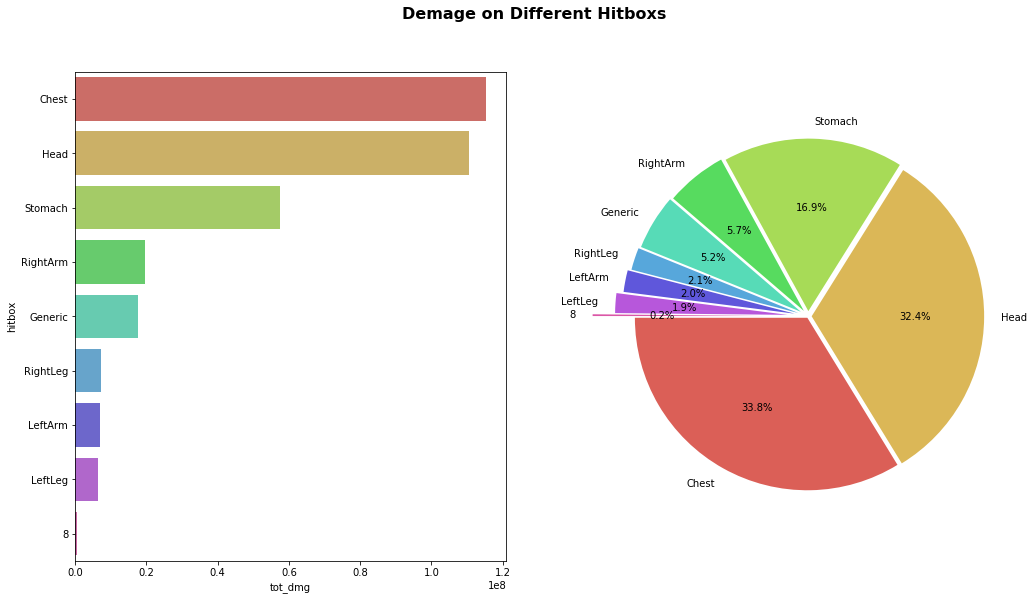

In [63]:
#from matplotlib import ticker
fig = plt.figure(figsize=(17, 9))
plt.subplot(1,2,1)
colors1=sns.color_palette("hls", 9)
sns.barplot(y=dmg_hitbox_sum_pd['hitbox'],x=dmg_hitbox_sum_pd['tot_dmg'],palette=colors1)
#.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

plt.subplot(1,2,2)
colors=sns.color_palette("hls", 9)
plt.pie(dmg_hitbox_sum_pd['tot_dmg'],labels=dmg_hitbox_sum_pd['hitbox'],\
        colors=colors1,startangle=180,\
        autopct='%1.1f%%',explode = (0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.12,0.25))
plt.suptitle('Demage on Different Hitboxs', fontsize=16, fontweight='bold')

‰º§ÂÆ≥Êù°ÁõÆÁöÑÂØπÊØîÔºåËÉ∏ÊúÄÂ§öÔºåÂÖ∂Ê¨°ÊòØËÇöÂ≠êÂíåÂ§¥ÔºåËøô‰∏é‰∏çÂêåÈÉ®‰ΩçÁöÑ‰º§ÂÆ≥Èáè‰∏çÂêåÊúâÂÖ≥„ÄÇ

Text(0.5, 0.98, 'Records of Different Hitboxs')

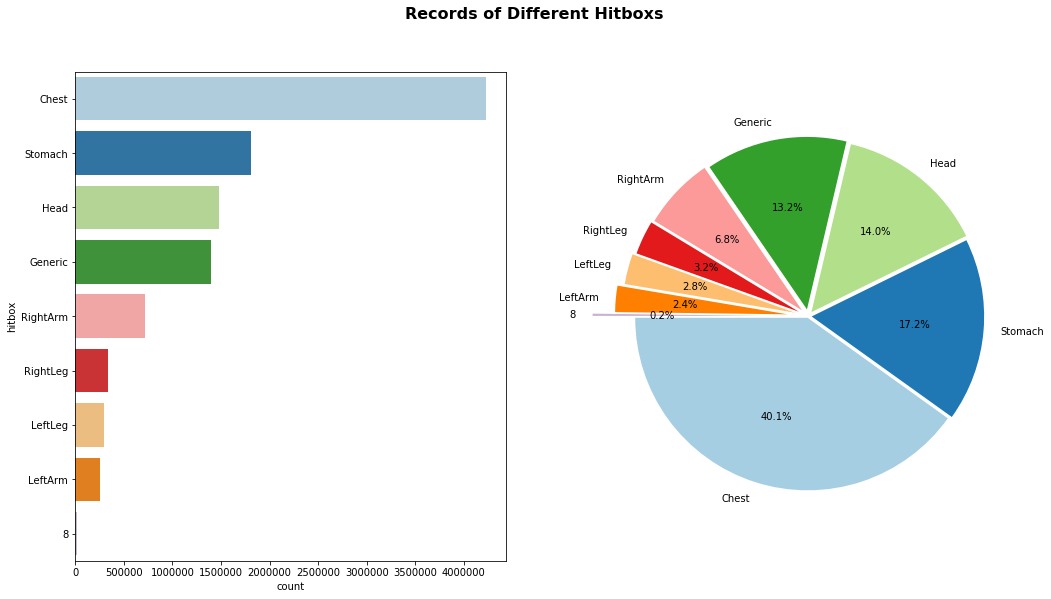

In [64]:
#from matplotlib import ticker
fig = plt.figure(figsize=(17, 9))
plt.subplot(1,2,1)
colors1=sns.color_palette("Paired",10)
sns.barplot(y=dmg_hitbox_pd['hitbox'],x=dmg_hitbox_pd['count'],palette=colors1)
#.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

plt.subplot(1,2,2)
colors=sns.color_palette("hls", 9)
plt.pie(dmg_hitbox_pd['count'],labels=dmg_hitbox_pd['hitbox'],\
        colors=colors1,startangle=180,\
        autopct='%1.1f%%',explode = (0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.12,0.25))
plt.suptitle('Records of Different Hitboxs', fontsize=16, fontweight='bold')

ÂèØ‰ª•ÁúãÂá∫ÔºåËÇöÂ≠êÁöÑ‰º§ÂÆ≥Êù°ÁõÆÂ§ö‰∫éÂ§¥Ôºå‰ΩÜÊòØÂ§¥ÁöÑÊÄª‰º§ÂÆ≥ÈáèÈ´ò‰∫éËÇöÂ≠ê„ÄÇ

ÊâìËÖøÊ≤°ÊúâÁî≤„ÄÇ

> ÂèØ‰ª•ÁúãÂá∫ÔºåÊâÄÊúâÊ≠¶Âô®ÁöÑÁªºÂêàÁàÜÂ§¥ÁéáÔºåÔºà‰πüÂèØ‰ª•ÁêÜËß£‰∏∫ÊâÄÊúâÁé©ÂÆ∂Âú®ÊØîËµõ‰∏≠ÁöÑÁªºÂêàÁàÜÂ§¥ÁéáÔºâÔºåÂè™Êúâ16%ÔºåÊØîËµõ‰∏≠Êõ¥Â§öÁöÑ‰º§ÂÆ≥ÔºåËøòÊòØ‰æùÈù†ÈïøÊû™Âáª‰∏≠ËÉ∏ÈÉ®ÂíåËÖπÈÉ®‰∫ßÁîüÁöÑ„ÄÇ

In [65]:
#dmg_df.select('wp','wp_type','hp_dmg','arm_dmg','hitbox').#filter("hitbox='8'").show(40)

In [66]:
#countsRDD = stringRDD.map(lambda word : (word, 1)).reduceByKey(lambda x,y : x+y)

### Êû™Ê¢∞ÁàÜÂ§¥ÁéáÊéíË°å

ÁàÜÂ§¥ÁéáÔºö

$$
\rm{Head \ Shot\ Rate}=\frac{\rm{Count\ of\ Head}}{\rm{Count\ of\ ALL\ Hitbox}}
$$

In [67]:
dmg_all_hit_1=dmg_wp_list.groupBy('wp','hitbox').count().\
                orderBy('count',ascending=0 )
dmg_all_hit_1.show(50)

+----------+--------+-------+
|        wp|  hitbox|  count|
+----------+--------+-------+
|      AK47|   Chest|1385042|
|Incendiary| Generic| 782888|
|      AK47| Stomach| 668950|
|      M4A4|   Chest| 668417|
|      AK47|    Head| 473126|
|        HE| Generic| 469987|
|      M4A4| Stomach| 323452|
|      AK47|RightArm| 245840|
|       USP|   Chest| 230610|
|     Glock|   Chest| 220570|
|       AWP|   Chest| 219290|
|    Deagle|   Chest| 201443|
|       MP7|   Chest| 198903|
|      M4A4|    Head| 194640|
|      M4A1|   Chest| 165586|
|        CZ|   Chest| 153662|
|       USP|    Head| 130791|
|      AK47|RightLeg| 129086|
|      M4A4|RightArm| 119075|
|      P250|   Chest| 117749|
|     Glock|    Head| 116769|
|      AK47| LeftLeg| 115310|
|     Famas|   Chest| 107791|
|   Unknown| Generic| 103280|
|     Mac10|   Chest| 100844|
|    Deagle|    Head| 100688|
|       UMP|   Chest|  99328|
|       MP7| Stomach|  99026|
|       MP9|   Chest|  96944|
|      AK47| LeftArm|  89674|
|       AW

In [8]:
#ÂÖ®ÈÉ®‰º§ÂÆ≥Êù°ÁõÆ
dmg_all_hit=dmg_wp_list.groupBy('wp').count().orderBy('count',ascending=0 ).toPandas().head(40)
#Âáª‰∏≠Â§¥ÈÉ®ÁöÑÊù°ÁõÆ
dmg_head_hit=dmg_wp_list.filter("hitbox='Head'").groupBy('wp').count().withColumnRenamed("count", "count_h").\
                         orderBy('count_h',ascending=0 ).toPandas()

#dmg_all_hit.join(dmg_head_hit ,dmg_all_hit.wp == dmg_head_hit.wp, "left_outer")

In [9]:
#ÈìæÊé•Ë°®
#Âú®Pandas‰∏≠join
dmg_head_rate=dmg_head_hit.join(dmg_all_hit.set_index('wp'), on='wp')
#ËÆ°ÁÆóÁàÜÂ§¥Áéá
dmg_head_rate['head_rate']=dmg_head_rate['count_h']/dmg_head_rate['count']
dmg_head_rate=dmg_head_rate.sort_values('head_rate',ascending=0 )
dmg_head_rate

wp  count_h    count  head_rate
2            USP   130791   462254   0.282942
15         P2000    15398    56231   0.273835
3          Glock   116769   435716   0.267993
4         Deagle   100688   426307   0.236187
16         Scout    14469    64328   0.224925
6           P250    52273   249322   0.209661
24  DualBarettas     1976     9659   0.204576
14     FiveSeven    15793    80439   0.196335
25          Tec9     1868     9786   0.190885
29      SawedOff      713     4126   0.172807
19         Swag7     6556    38449   0.170512
11           MP9    31833   197649   0.161058
5             CZ    54508   340874   0.159907
21          Nova     2828    17900   0.157989
0           AK47   473126  3115867   0.151844
10         Mac10    32604   218457   0.149247
23         SG556     2785    18890   0.147433
12           UMP    30610   208544   0.146780
1           M4A4   194640  1463705   0.132978
31          M249       86      654   0.131498
8           M4A1    48242   368527   0.130905
17        Gallil    12705    98004   0.129638
20        XM1014     5060    40529   0.124849
7            MP7    51855   427649   0.121256
13         Famas    29552   249257   0.118560
26         Bizon     1224    10480   0.116794
22           AUG     2813    24122   0.116616
30         G3SG1      358     3189   0.112261
18           P90     7791    71122   0.109544
27         Negev      809     8543   0.094697
28        Scar20      732     7870   0.093011
9            AWP    37200   415525   0.089525

In [10]:
print(dmg_head_rate.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &            wp &  count\_h &    count &  head\_rate \\
\midrule
2  &           USP &   130791 &   462254 &   0.282942 \\
15 &         P2000 &    15398 &    56231 &   0.273835 \\
3  &         Glock &   116769 &   435716 &   0.267993 \\
4  &        Deagle &   100688 &   426307 &   0.236187 \\
16 &         Scout &    14469 &    64328 &   0.224925 \\
6  &          P250 &    52273 &   249322 &   0.209661 \\
24 &  DualBarettas &     1976 &     9659 &   0.204576 \\
14 &     FiveSeven &    15793 &    80439 &   0.196335 \\
25 &          Tec9 &     1868 &     9786 &   0.190885 \\
29 &      SawedOff &      713 &     4126 &   0.172807 \\
19 &         Swag7 &     6556 &    38449 &   0.170512 \\
11 &           MP9 &    31833 &   197649 &   0.161058 \\
5  &            CZ &    54508 &   340874 &   0.159907 \\
21 &          Nova &     2828 &    17900 &   0.157989 \\
0  &          AK47 &   473126 &  3115867 &   0.151844 \\
10 &         Mac10 &    32604 &   218457 &   

ÁîªÂõæÔºö

Text(0.5, 0.98, 'Head Shot Rate of Weapons')

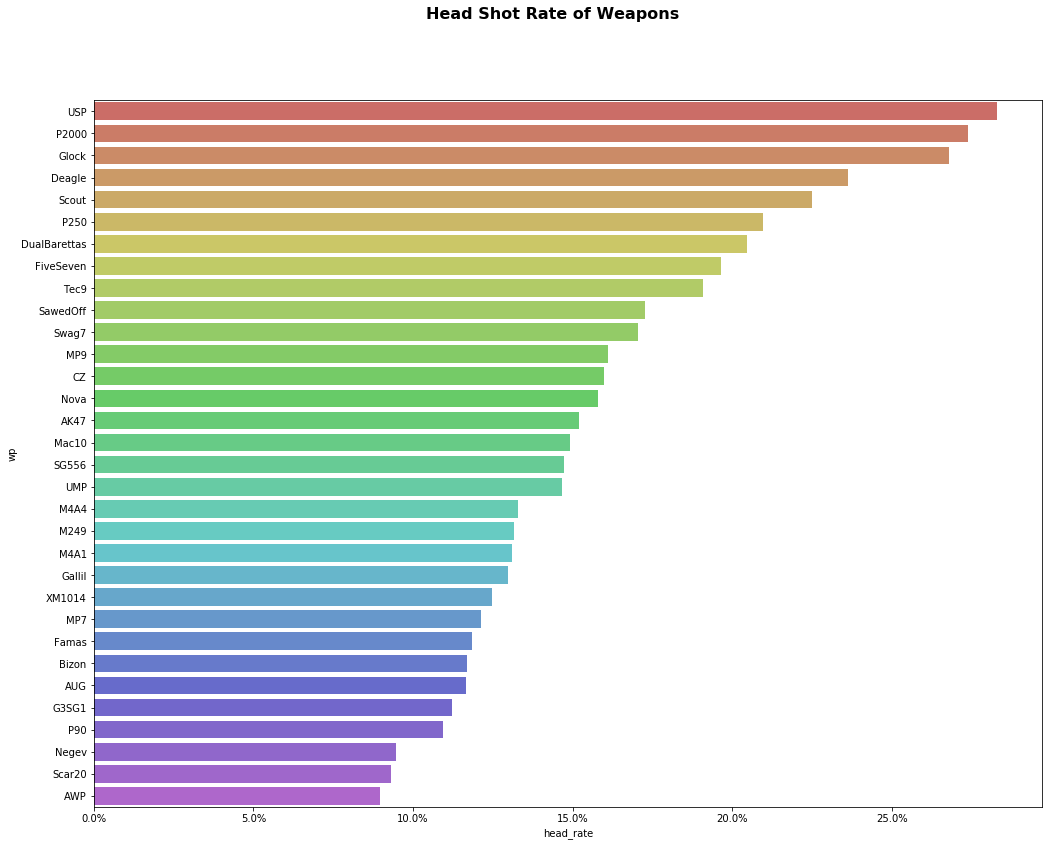

In [70]:
#from matplotlib import ticker
fig = plt.figure(figsize=(17, 13))
#plt.subplot(1,2,1)
colors1=sns.color_palette("hls",40)
sns.barplot(y=dmg_head_rate['wp'],x=dmg_head_rate['head_rate'],palette=colors1)\
            .xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.suptitle('Head Shot Rate of Weapons', fontsize=16, fontweight='bold')

### Â®ÅÂäõÊéíË°å

all_dmg/all_count

Âç≥ËÆ°ÁÆó**ADR**, Attack Damage Ratio

In [13]:
#ÈìæÊé•Ë°®
wp_dmg_rate=dmg_wp_sum_pd.join(dmg_count.set_index('wp'), on='wp')
#ËÆ°ÁÆóÂçïÂèë‰º§ÂÆ≥
wp_dmg_rate['dmg_rate']=wp_dmg_rate['tot_dmg']/wp_dmg_rate['count']
wp_dmg_rate=wp_dmg_rate.sort_values('dmg_rate',ascending=0 )
wp_dmg_rate

wp      tot_dmg      hp_dmg     arm_dmg    wp_type    count  \
34          Zeus     149643.0    149643.0         0.0  Equipment     1738   
2            AWP   34445328.0  34013206.0    432122.0     Sniper   415525   
15         Scout    4642997.0   4158674.0    484323.0     Sniper    64328   
27        Scar20     432829.0    382646.0     50183.0     Sniper     7870   
33         G3SG1     174113.0    156052.0     18061.0     Sniper     3189   
26         Knife     433870.0    393608.0     40262.0  Equipment     8673   
3         Deagle   20967316.0  20171835.0    795481.0     Pistol   426307   
4            USP   17441255.0  14527886.0   2913369.0     Pistol   462254   
10          P250    9383852.0   7419927.0   1963925.0     Pistol   249322   
19         P2000    2104648.0   1744828.0    359820.0     Pistol    56231   
0           AK47  109725947.0  98743694.0  10982253.0      Rifle  3115867   
29  DualBarettas     316261.0    255839.0     60422.0     Pistol     9659   
30          Tec9     310827.0    298956.0     11871.0     Pistol     9786   
25         SG556     599715.0    599715.0         0.0      Rifle    18890   
6           M4A1   11662392.0   9805285.0   1857107.0      Rifle   368527   
18     FiveSeven    2515889.0   2412482.0    103407.0     Pistol    80439   
5          Glock   13562451.0  11582232.0   1980219.0     Pistol   435716   
1           M4A4   45141653.0  38014304.0   7127349.0      Rifle  1463705   
36          M249      19691.0     17776.0      1915.0      Heavy      654   
8             CZ   10135325.0   8941360.0   1193965.0     Pistol   340874   
17        Gallil    2906578.0   2629004.0    277574.0      Rifle    98004   
31         Negev     244431.0    211055.0     33376.0      Heavy     8543   
11         Famas    7048810.0   6022529.0   1026281.0      Rifle   249257   
24           AUG     660421.0    633993.0     26428.0      Rifle    24122   
12           UMP    5582052.0   4699330.0    882722.0        SMG   208544   
35      SawedOff     106787.0     96800.0      9987.0      Heavy     4126   
13         Mac10    5329044.0   4455269.0    873775.0        SMG   218457   
14           MP9    4767964.0   3940245.0    827719.0        SMG   197649   
7             HE   11262324.0   9033918.0   2228406.0    Grenade   469987   
9            MP7    9900292.0   8372636.0   1527656.0        SMG   427649   
21           P90    1590650.0   1376481.0    214169.0        SMG    71122   
22         Swag7     851699.0    761738.0     89961.0      Heavy    38449   
28          Nova     392664.0    289229.0    103435.0      Heavy    17900   
32         Bizon     227273.0    188944.0     38329.0        SMG    10480   
20       Unknown    1854692.0   1295327.0    559365.0     Unkown   103280   
23        XM1014     709763.0    662816.0     46947.0      Heavy    40529   
16    Incendiary    3954677.0   3954677.0         0.0    Grenade   782888   
37       Molotov      14093.0     14093.0         0.0    Grenade    11732   
39         Flash       6790.0      6638.0       152.0    Grenade     5664   
38         Smoke      11911.0     11780.0       131.0    Grenade    10237   
40         Decoy          8.0         8.0         0.0    Grenade        8   
41          Bomb          1.0         1.0         0.0  Equipment        1   

     dmg_rate  
34  86.100690  
2   82.895922  
15  72.176921  
27  54.997332  
33  54.597993  
26  50.025366  
3   49.183607  
4   37.730890  
10  37.637481  
19  37.428607  
0   35.215222  
29  32.742623  
30  31.762416  
25  31.747750  
6   31.645964  
18  31.276980  
5   31.126814  
1   30.840677  
36  30.108563  
8   29.733347  
17  29.657749  
31  28.611846  
11  28.279286  
24  27.378368  
12  26.766783  
35  25.881483  
13  24.394018  
14  24.123390  
7   23.963054  
9   23.150509  
21  22.365091  
22  22.151395  
28  21.936536  
32  21.686355  
20  17.957901  
23  17.512473  
16   5.051396  
37   1.201244  
39   1.198799  
38   1.163524  
40   1.000000  
41   1.000000

In [15]:
print(wp_dmg_rate.to_latex
      ())

\begin{tabular}{llrrrlrr}
\toprule
{} &            wp &      tot\_dmg &      hp\_dmg &     arm\_dmg &    wp\_type &    count &   dmg\_rate \\
\midrule
34 &          Zeus &     149643.0 &    149643.0 &         0.0 &  Equipment &     1738 &  86.100690 \\
2  &           AWP &   34445328.0 &  34013206.0 &    432122.0 &     Sniper &   415525 &  82.895922 \\
15 &         Scout &    4642997.0 &   4158674.0 &    484323.0 &     Sniper &    64328 &  72.176921 \\
27 &        Scar20 &     432829.0 &    382646.0 &     50183.0 &     Sniper &     7870 &  54.997332 \\
33 &         G3SG1 &     174113.0 &    156052.0 &     18061.0 &     Sniper &     3189 &  54.597993 \\
26 &         Knife &     433870.0 &    393608.0 &     40262.0 &  Equipment &     8673 &  50.025366 \\
3  &        Deagle &   20967316.0 &  20171835.0 &    795481.0 &     Pistol &   426307 &  49.183607 \\
4  &           USP &   17441255.0 &  14527886.0 &   2913369.0 &     Pistol &   462254 &  37.730890 \\
10 &          P250 &    9383852.0

Text(0.5, 0.98, 'Average Demage per Shot of Weapons')

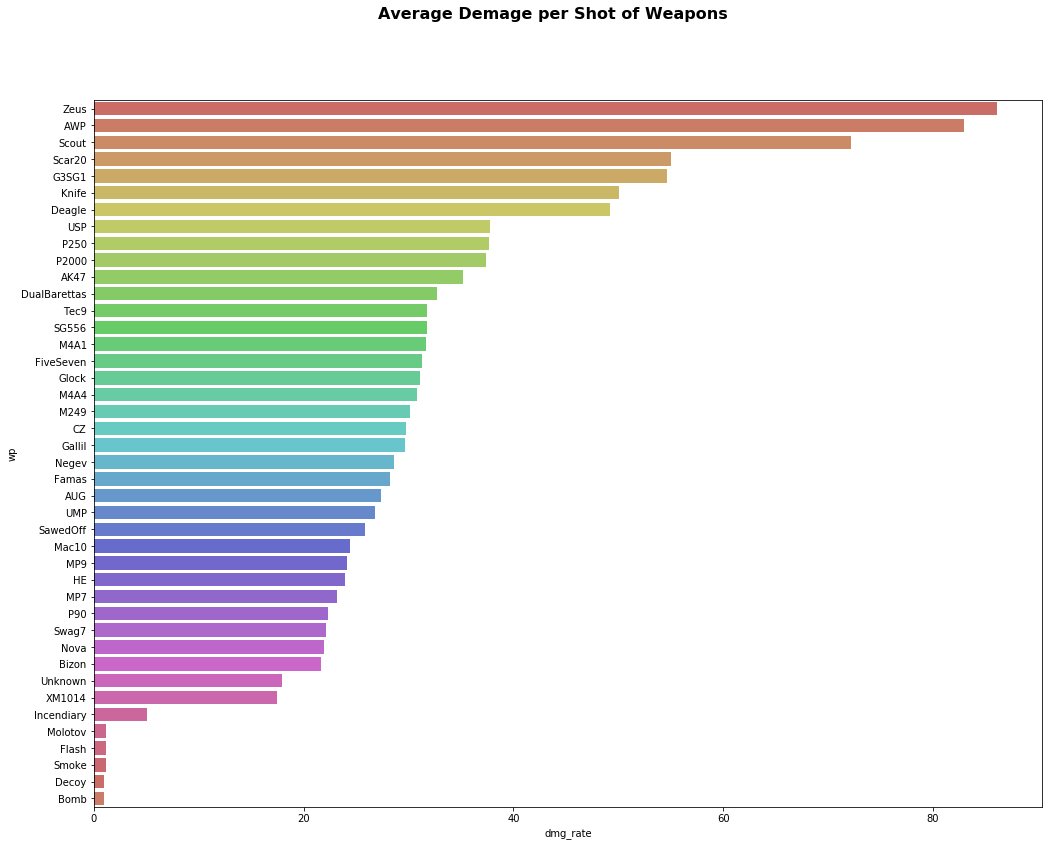

In [72]:
#from matplotlib import ticker
fig = plt.figure(figsize=(17, 13))
#plt.subplot(1,2,1)
colors1=sns.color_palette("hls",40)
sns.barplot(y=wp_dmg_rate['wp'],x=wp_dmg_rate['dmg_rate'],palette=colors1)\
           # .xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.suptitle('Average Demage per Shot of Weapons', fontsize=16, fontweight='bold')

ÂèØ‰ª•Âà§Êñ≠ÁàÜÂ§¥Áéá‰∏éÂ®ÅÂäõÁöÑÁõ∏ÂÖ≥ÊÄßÊõ≤Á∫ø

# killË°®ÂàÜÊûê

##  ‰∏çÂêåÊû™Ê¢∞ÂáªÊùÄÊ¨°Êï∞ÊéíË°åÊ¶ú `wp`

ÂèØ‰ª•ÂÅöÊàê‰∏çÂêåtypeÁöÑÂ§¥10Âêç

In [10]:
kill_count=kill_df.select('wp','wp_type').groupBy('wp_type','wp').count().orderBy('count',ascending=0).toPandas()
kill_count

wp_type            wp   count
0       Rifle          AK47  949525
1      Sniper           AWP  366900
2       Rifle          M4A4  356118
3      Pistol        Deagle  170734
4      Pistol           USP  132761
5      Pistol         Glock  104182
6       Rifle          M4A1   92343
7         SMG           MP7   76940
8      Pistol            CZ   73813
9      Pistol          P250   62615
10      Rifle         Famas   55556
11        SMG           UMP   42978
12        SMG         Mac10   41258
13        SMG           MP9   37237
14     Sniper         Scout   28224
15      Rifle        Gallil   23718
16     Pistol     FiveSeven   21360
17    Grenade            HE   19099
18     Pistol         P2000   15667
19        SMG           P90   12489
20    Grenade    Incendiary   11916
21      Heavy         Swag7    6173
22      Rifle           AUG    5947
23      Heavy        XM1014    5766
24      Rifle         SG556    5570
25  Equipment         Knife    4779
26     Sniper        Scar20    3655
27     Pistol          Tec9    2490
28      Heavy          Nova    2295
29     Pistol  DualBarettas    2209
30      Heavy         Negev    1896
31        SMG         Bizon    1689
32  Equipment          Zeus    1612
33     Sniper         G3SG1    1411
34     Pistol      Revolver     785
35      Heavy      SawedOff     755
36      Heavy          M249     145
37    Grenade         Flash      10
38     Unkown         World       9
39    Grenade       Molotov       9
40    Grenade         Smoke       7
41    Grenade         Decoy       1

Text(0.5, 1.0, 'Kill Counting of Weapons')

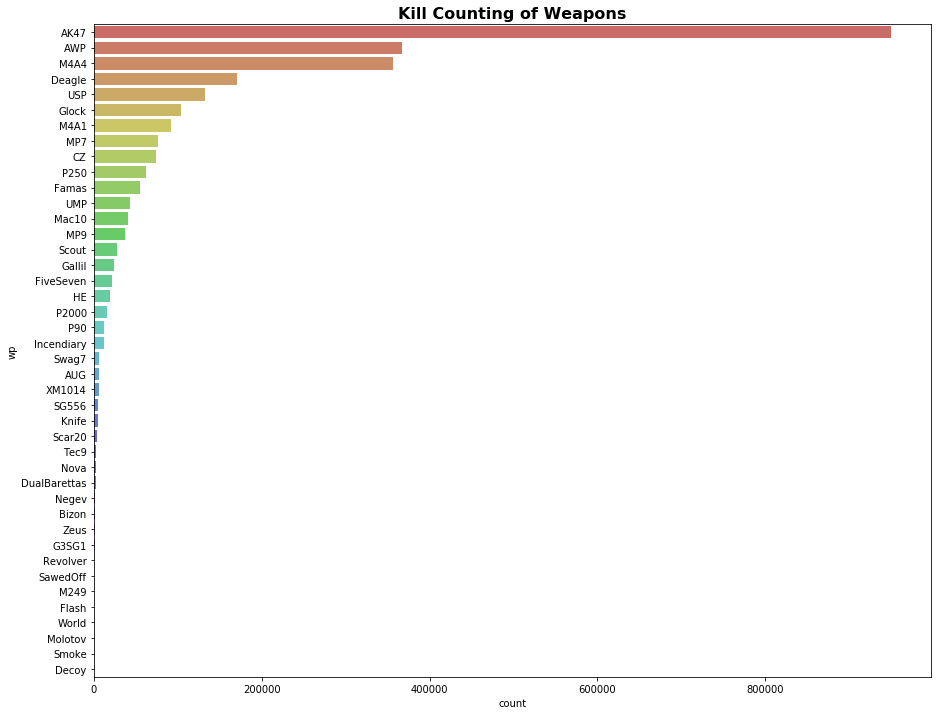

In [44]:
#from matplotlib import ticker
fig = plt.figure(figsize=(15, 12))
#plt.subplot(1,2,1)
colors1=sns.color_palette("hls",40)
sns.barplot(y=kill_count['wp'],x=kill_count['count'],palette=colors1)\
           # .xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title('Kill Counting of Weapons', fontsize=16, fontweight='bold')

Áé∞ÈÄâÊã©ÈÉ®ÂàÜÂàóÔºö

In [75]:
#file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted
kill_list=kill_df.select('wp','wp_type','att_side','ct_alive','t_alive','is_bomb_planted').orderBy('wp')
kill_list.show(50)

+----+-------+----------------+--------+-------+---------------+
|  wp|wp_type|        att_side|ct_alive|t_alive|is_bomb_planted|
+----+-------+----------------+--------+-------+---------------+
|AK47|  Rifle|       Terrorist|       4|      5|          False|
|AK47|  Rifle|       Terrorist|       3|      5|          False|
|AK47|  Rifle|       Terrorist|       4|      5|          False|
|AK47|  Rifle|       Terrorist|       2|      3|          False|
|AK47|  Rifle|       Terrorist|       3|      5|          False|
|AK47|  Rifle|CounterTerrorist|       1|      2|           True|
|AK47|  Rifle|       Terrorist|       2|      5|          False|
|AK47|  Rifle|       Terrorist|       3|      3|          False|
|AK47|  Rifle|       Terrorist|       1|      5|          False|
|AK47|  Rifle|CounterTerrorist|       5|      3|          False|
|AK47|  Rifle|       Terrorist|       0|      5|           True|
|AK47|  Rifle|       Terrorist|       4|      2|          False|
|AK47|  Rifle|       Terr

## CTÂâ©‰Ωô1‰∫∫Êó∂Áî®ÁöÑÊû™ÊúÄÂ§ö

Á≠õÈÄâÂá∫ CTËøòÂâ©‰Ωô1‰∫∫Êó∂ÔºåÂáªÊùÄÊñπÊó∂CTÁöÑÊï∞ÊçÆ

In [45]:
kill_ct_1_pd=kill_df.select('wp','wp_type','att_side','ct_alive','t_alive','is_bomb_planted').\
                filter("ct_alive='1' and att_side='CounterTerrorist'").groupBy('wp').\
                count().orderBy('count',ascending=0).toPandas()
kill_ct_1_pd

wp  count
0           AK47  26436
1           M4A4  25629
2            AWP  17517
3            USP  12380
4         Deagle  10976
5           M4A1   6555
6             CZ   4837
7           P250   4008
8          Famas   3488
9            MP7   2993
10     FiveSeven   2378
11           UMP   1893
12           MP9   1846
13         P2000   1541
14         Scout   1280
15         Mac10    642
16            HE    576
17           P90    462
18           AUG    449
19        Gallil    449
20         Swag7    416
21    Incendiary    391
22         Knife    377
23         Glock    283
24        XM1014    251
25        Scar20    199
26          Nova    183
27          Zeus    168
28  DualBarettas    125
29         Negev     98
30         SG556     85
31      Revolver     45
32         Bizon     45
33         G3SG1     25
34          Tec9     13
35      SawedOff     11
36          M249      9
37       Molotov      1

ÁîªÂõæÊòæÁ§∫ÔºåCTËøòÂâ©‰Ωô1‰∫∫Êó∂ÔºåCTÈÄ†ÊàêÂáªÊùÄÁöÑÊû™ÁöÑÊéíÂêçÔºö

Text(0.5, 1.0, 'Kill Counting of Weapons when 1 CT alives')

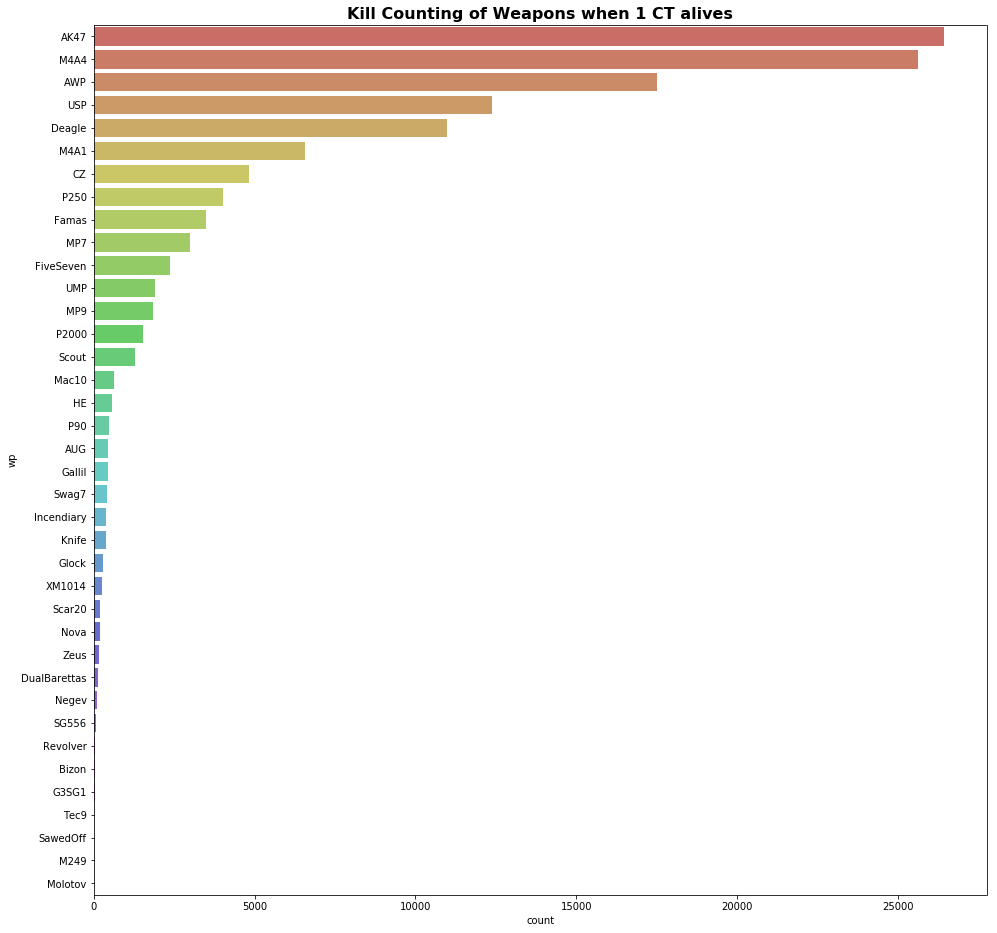

In [46]:
fig = plt.figure(figsize=(16, 16))
#plt.subplot(1,2,1)
colors1=sns.color_palette("hls",40)
sns.barplot(y=kill_ct_1_pd['wp'],x=kill_ct_1_pd['count'],palette=colors1)\
           # .xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title('Kill Counting of Weapons when 1 CT alives', fontsize=16, fontweight='bold')

It is clearly to see that CTs are most likely to give a kill by AK-47 taken from T side.